In [1]:
import sys, os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import seaborn as sns

sys.path.append(os.path.join(os.getcwd(), '..'))
from src.util import *

In [2]:
with open('../data/results.pkl', 'rb') as f:
    results = pickle.load(f)

df = pd.read_csv('../data/test_cases.csv', usecols=range(0, 14))

In [3]:
df.head()
losses, rewards, mean_reward, fig1, fig2 = results[30]

In [4]:
mean_rewards = []

mean_reward

20.462649235861686

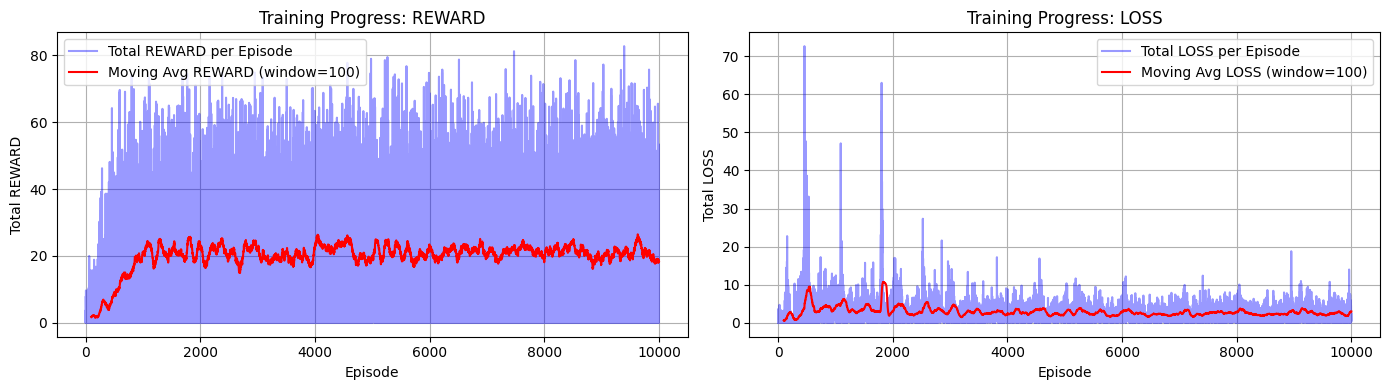

In [5]:
show_figure(fig1)
plt.show()

In [6]:
mean_rewards = []

for index, row in df.iterrows():
    mean_reward = results[index][2]  
    mean_rewards.append(mean_reward)
df['RL_Price'] = mean_rewards

In [7]:
df['European_Price'] = df.apply(
    lambda row: black_scholes(
        s=row['s_0'],
        k=100, 
        t1 = 0,
        t2=row['t2'],
        r=row['r'],
        v=row['v'] if not np.isnan(row['v']) else row['sigma'],  
        q = row['q'],
        call=row['h'].split('_')[-1].lower() == "call"
    ),
    axis=1
)

In [8]:
k = 100
call = partial(lambda x, k: np.maximum(x - k, 0), k=k)
put = partial(lambda x, k: np.maximum(k - x, 0), k=k)

df['MC_Price'] = df.apply(
    lambda row: get_mc_price(
        generate_gbm_paths(
            nsim=1000,
            nstep=int(12 * row["t2"]),  
            t1=0,
            t2=row["t2"],
            s_0=row["s_0"],
            r=row["r"],
            q=row["q"],
            v=row["v"]
        ) if row["gbm"] else generate_heston_paths(
            nsim=1000,
            nstep=int(12 * row["t2"]),
            t1=0,
            t2=row["t2"],
            s_0=row["s_0"],
            r=row["r"],
            q=row["q"],
            v_0=row["v_0"],
            theta=row["theta"],
            rho=row["rho"],
            kappa=row["kappa"],
            sigma=row["sigma"]
        ),
        t1=0,
        t2=row["t2"],
        h=(call if row["h"].split('_')[-1].lower() == "call" else put), 
        r=row["r"]
    ),
    axis=1
)

In [9]:
# Value of Early Exercise
df['Early_Exe_Value_RL'] = df['RL_Price'] - df['European_Price']
df['Early_Exe_Value_MC'] = df['MC_Price'] - df['European_Price']

In [10]:
#df[(df["case"] == "Base_Case") & (df["gbm"] == True)]
df[(df["case"] == "Base_Case") ]

case  s_0    v   t2    q     r             h   v_0  theta  rho  \
0   Base_Case   80  0.2  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
1   Base_Case   80  NaN  1.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
2   Base_Case   80  0.2  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
3   Base_Case   80  NaN  2.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
4   Base_Case   80  0.4  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
5   Base_Case   80  NaN  1.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
6   Base_Case   80  0.4  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
7   Base_Case   80  NaN  2.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
8   Base_Case   90  0.2  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
9   Base_Case   90  NaN  1.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
10  Base_Case   90  0.2  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
11  Base_Case   90  NaN  2.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
12  Base_Case   90  0.4  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
13  Base_Case   90  NaN  1.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
14  Base_Case   90  0.4  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
15  Base_Case   90  NaN  2.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
16  Base_Case  100  0.2  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
17  Base_Case  100  NaN  1.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
18  Base_Case  100  0.2  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
19  Base_Case  100  NaN  2.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
20  Base_Case  100  0.4  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
21  Base_Case  100  NaN  1.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
22  Base_Case  100  0.4  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
23  Base_Case  100  NaN  2.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
24  Base_Case  110  0.2  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
25  Base_Case  110  NaN  1.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
26  Base_Case  110  0.2  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
27  Base_Case  110  NaN  2.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
28  Base_Case  110  0.4  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
29  Base_Case  110  NaN  1.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
30  Base_Case  110  0.4  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
31  Base_Case  110  NaN  2.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
32  Base_Case  120  0.2  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
33  Base_Case  120  NaN  1.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
34  Base_Case  120  0.2  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
35  Base_Case  120  NaN  2.0  0.0  0.04  American_Put  0.04   0.04 -0.7   
36  Base_Case  120  0.4  1.0  0.0  0.04  American_Put   NaN    NaN  NaN   
37  Base_Case  120  NaN  1.0  0.0  0.04  American_Put  0.16   0.16 -0.7   
38  Base_Case  120  0.4  2.0  0.0  0.04  American_Put   NaN    NaN  NaN   
39  Base_Case  120  NaN  2.0  0.0  0.04  American_Put  0.16   0.16 -0.7   

    kappa  sigma    gbm                                              notes  \
0     NaN    NaN   True  Base case with changing S_0, σ, and T for Amer...   
1     2.0    0.2  False  Base case with changing S_0, σ, and T for Amer...   
2     NaN    NaN   True  Base case with changing S_0, σ, and T for Amer...   
3     2.0    0.2  False  Base case with changing S_0, σ, and T for Amer...   
4     NaN    NaN   True  Base case with changing S_0, σ, and T for Amer...   
5     2.0    0.4  False  Base case with changing S_0, σ, and T for Amer...   
6     NaN    NaN   True  Base case with changing S_0, σ, and T for Amer...   
7     2.0    0.4  False  Base case with changing S_0, σ, and T for Amer...   
8     NaN    NaN   True  Base case with changing S_0, σ, and T for Amer...   
9     2.0    0.2  False  Base case with changing S_0, σ, and T for Amer...   
10    NaN    NaN   True  Base case with changing S_0, σ, and T for Amer... 

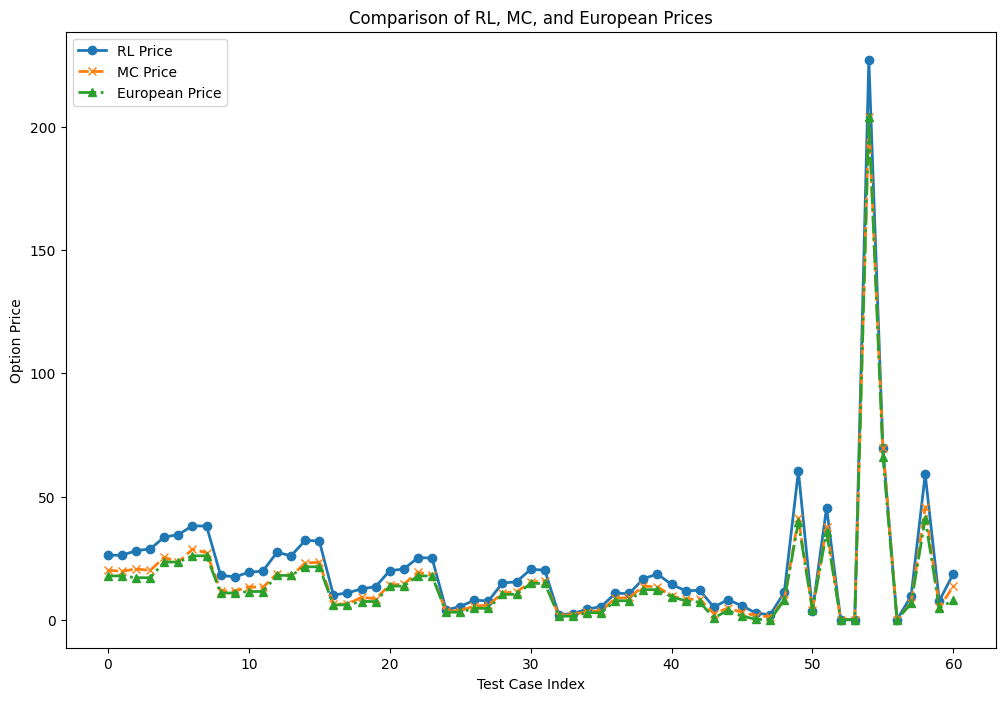

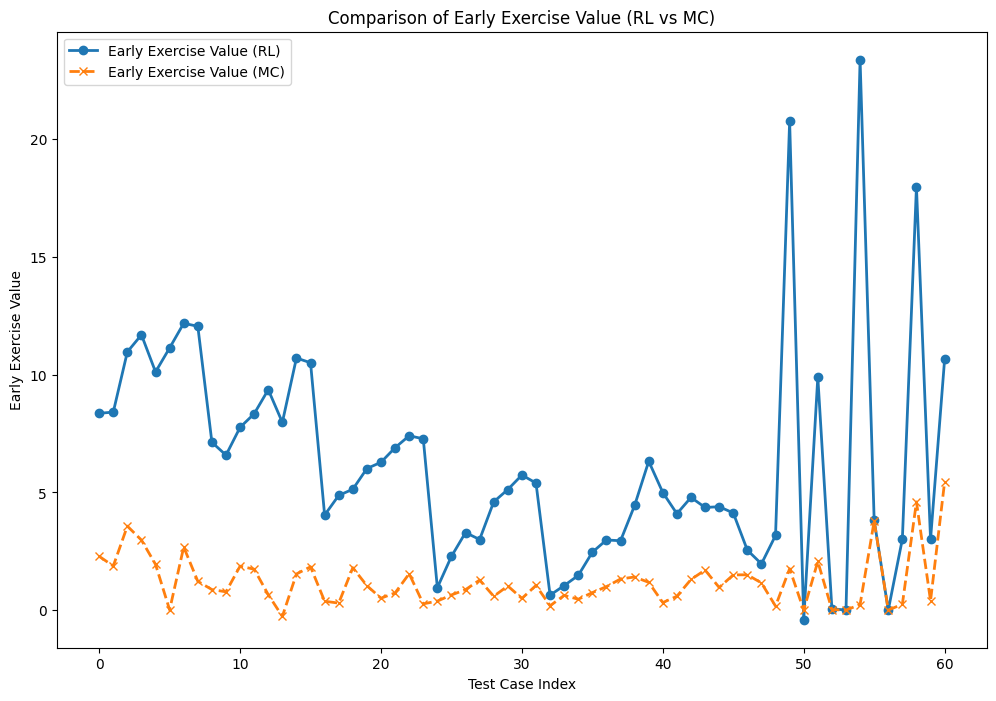

In [11]:
# Function to plot RL, MC, and European prices comparison
def plot_prices_comparison(df, title="Price Comparison Across Cases"):
    plt.figure(figsize=(12, 8))
    x = range(len(df))
    plt.plot(x, df['RL_Price'], marker='o', label='RL Price', linestyle='-', linewidth=2)
    plt.plot(x, df['MC_Price'], marker='x', label='MC Price', linestyle='--', linewidth=2)
    plt.plot(x, df['European_Price'], marker='^', label='European Price', linestyle='-.', linewidth=2)
    plt.title(title)
    plt.xlabel("Test Case Index")
    plt.ylabel("Option Price")
    plt.legend()
    plt.show()

# Function to plot early exercise value comparison
def plot_early_exercise_comparison(df, title="Early Exercise Value Comparison"):
    plt.figure(figsize=(12, 8))
    x = range(len(df))
    plt.plot(x, df['Early_Exe_Value_RL'], label="Early Exercise Value (RL)", marker='o', linestyle='-', linewidth=2)
    plt.plot(x, df['Early_Exe_Value_MC'], label="Early Exercise Value (MC)", marker='x', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel("Test Case Index")
    plt.ylabel("Early Exercise Value")
    plt.legend()
    plt.show()

# Plot RL vs MC vs European Prices
plot_prices_comparison(df, title="Comparison of RL, MC, and European Prices")

# Plot Early Exercise Values
plot_early_exercise_comparison(df, title="Comparison of Early Exercise Value (RL vs MC)")


/var/folders/l3/4qywm6wn4273cj1z5n54pm_h0000gn/T/ipykernel_98104/2705392139.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='case', y='Standardized_Diff', ci=None)


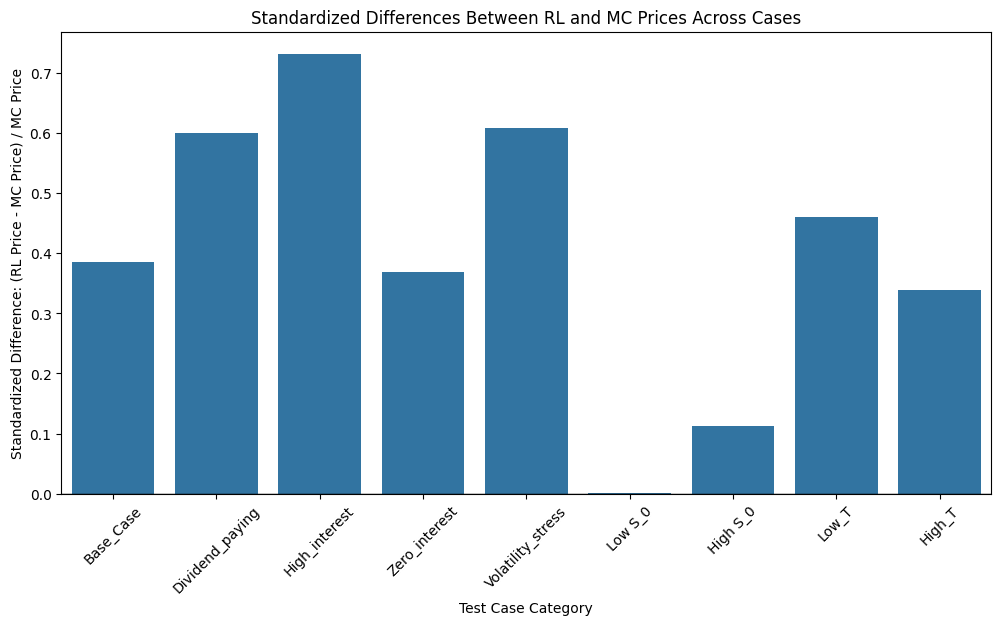

In [12]:
# Function to compare standardized price differences as a bar plot
def plot_standardized_price_differences(df, title="Standardized Price Differences: (RL - MC) / MC"):
    df['Standardized_Diff'] = (df['RL_Price'] - df['MC_Price']) / df['MC_Price']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='case', y='Standardized_Diff', ci=None)
    plt.title(title)
    plt.xlabel("Test Case Category")
    plt.ylabel("Standardized Difference: (RL Price - MC Price) / MC Price")
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=1)  # Reference line at 0
    plt.show()

# Plot standardized price differences between RL and MC
plot_standardized_price_differences(df, title="Standardized Differences Between RL and MC Prices Across Cases")

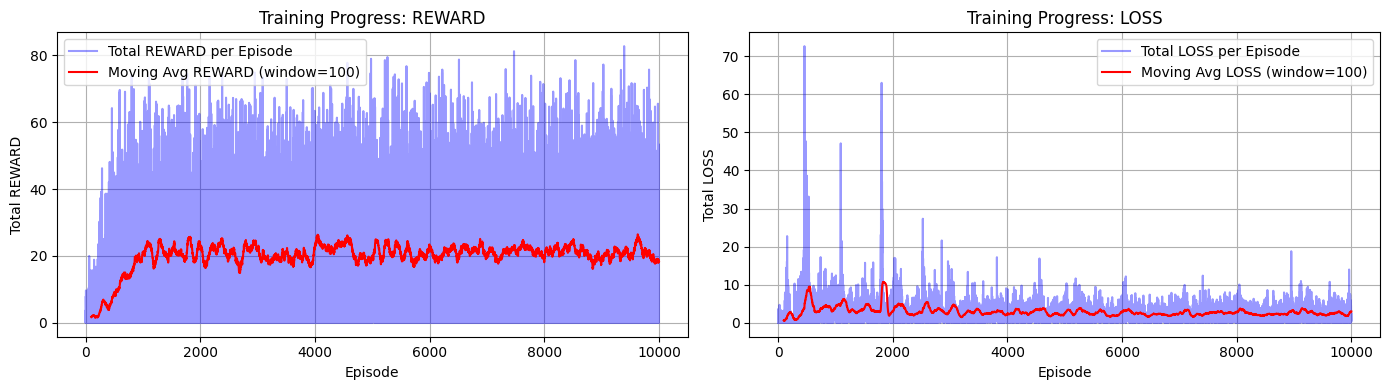

In [13]:
fig1

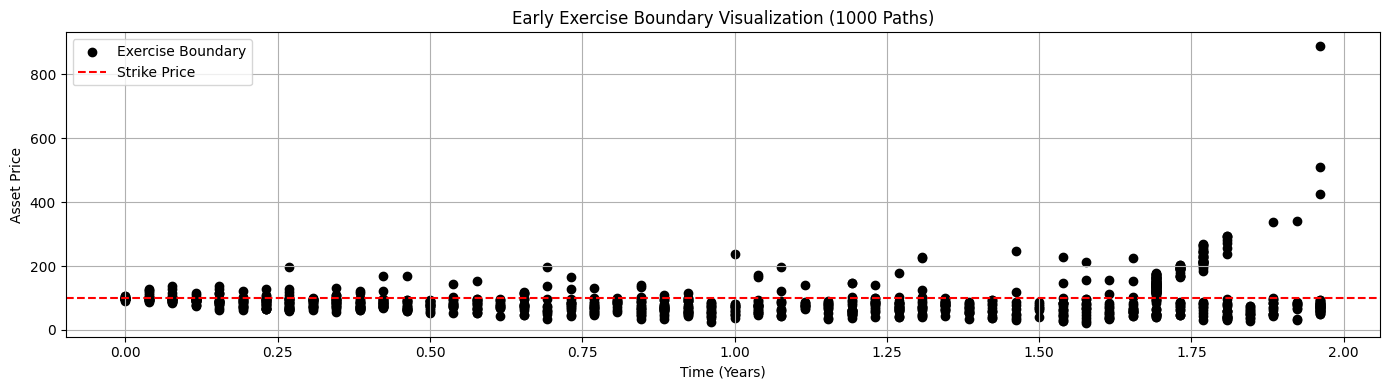

In [14]:
fig2


/Users/GuidoDeFilippo/Columbia/Reinforcement Learning/orcs-4529-rl/notebooks/../src/util.py:100: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  dummy = plt.figure()


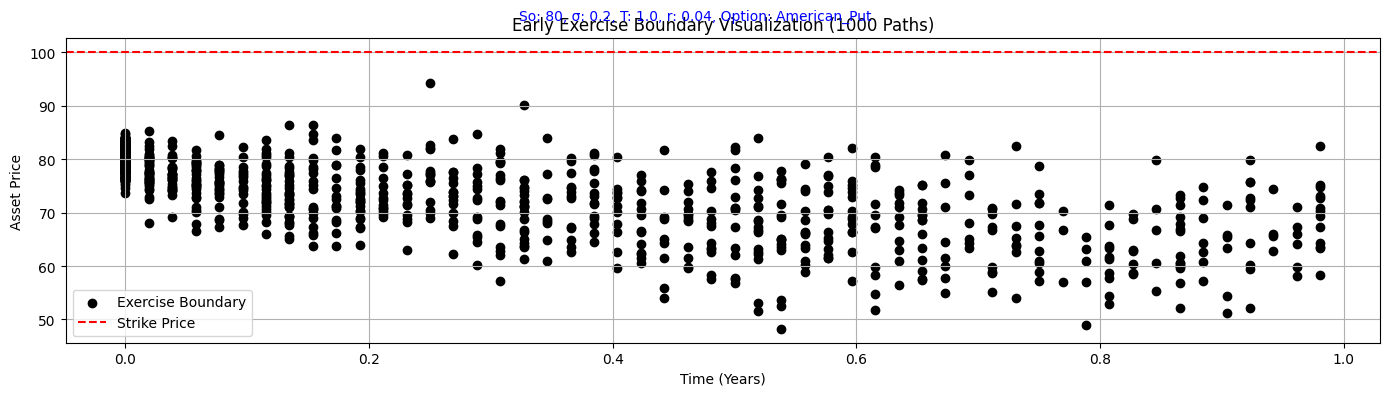

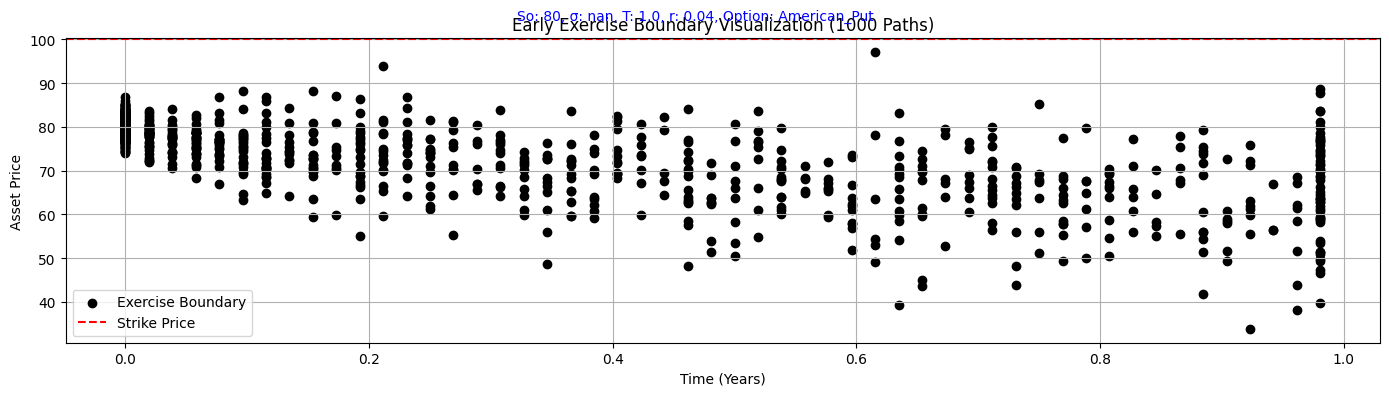

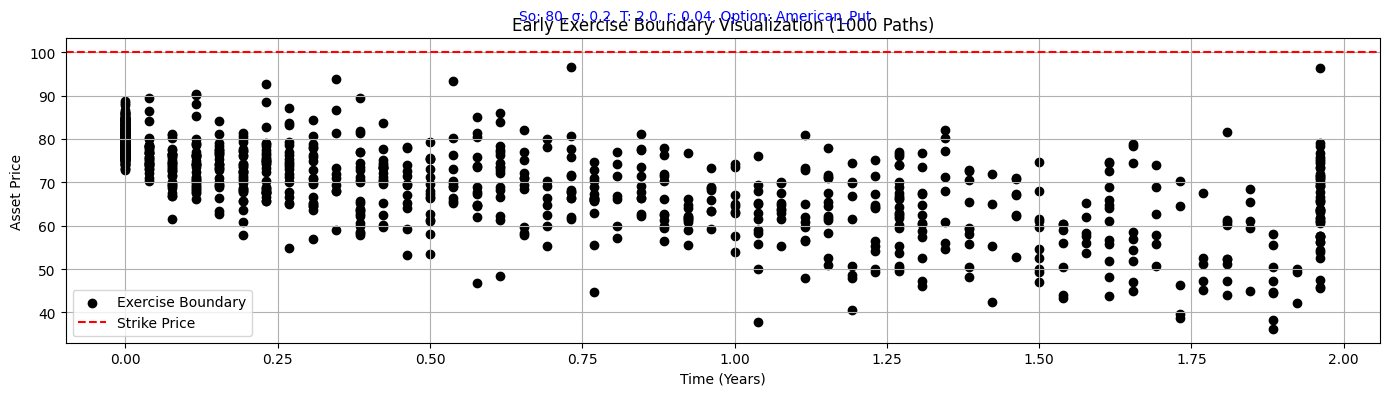

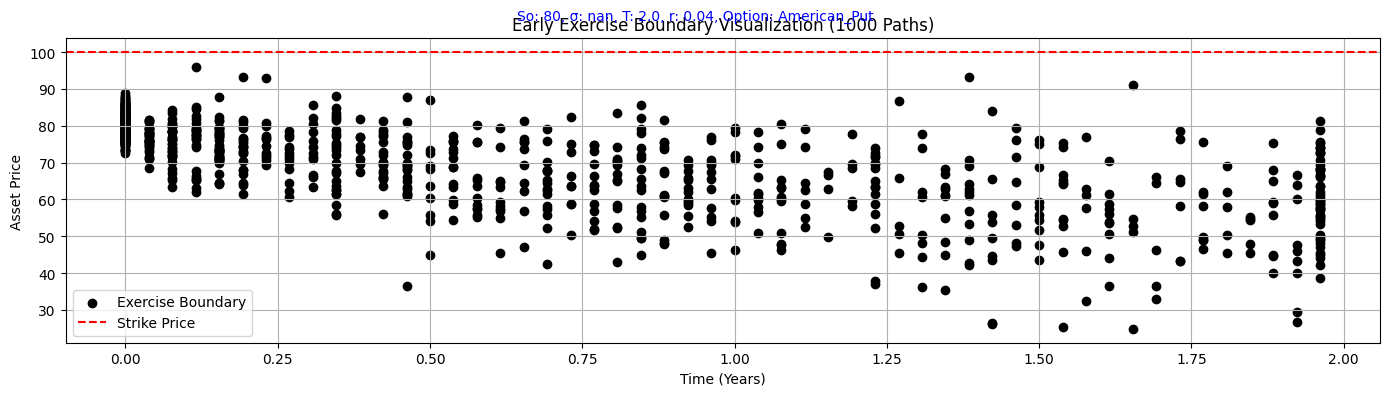

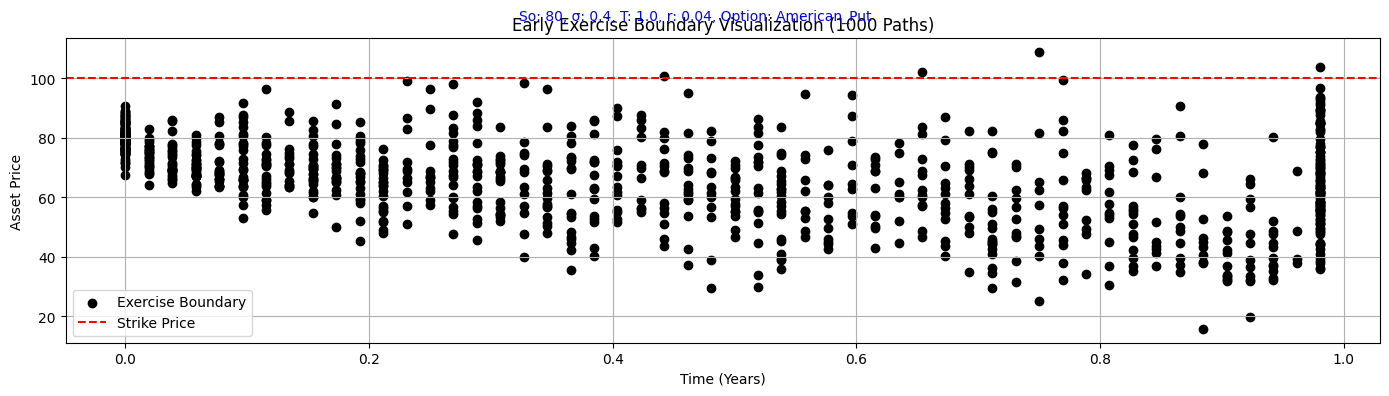

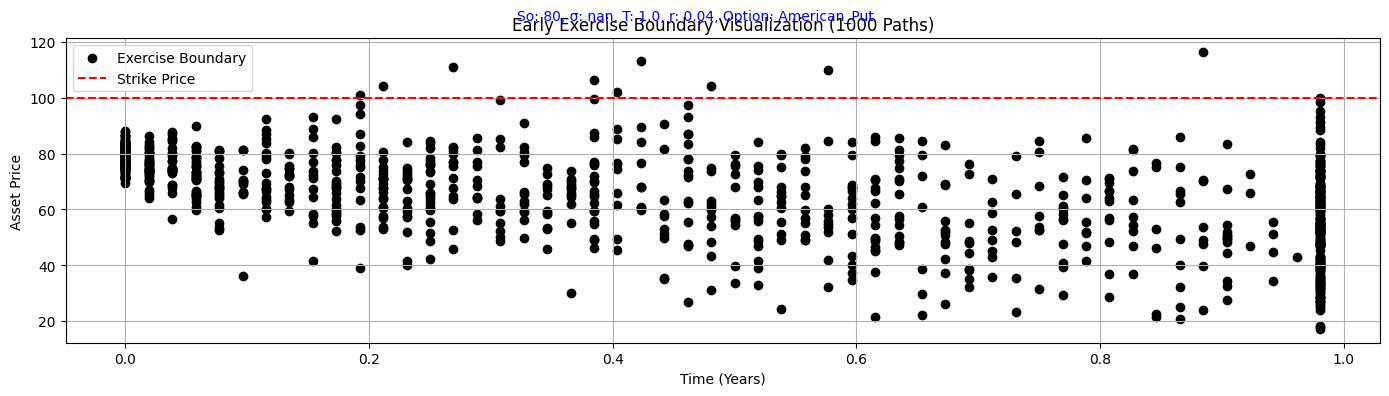

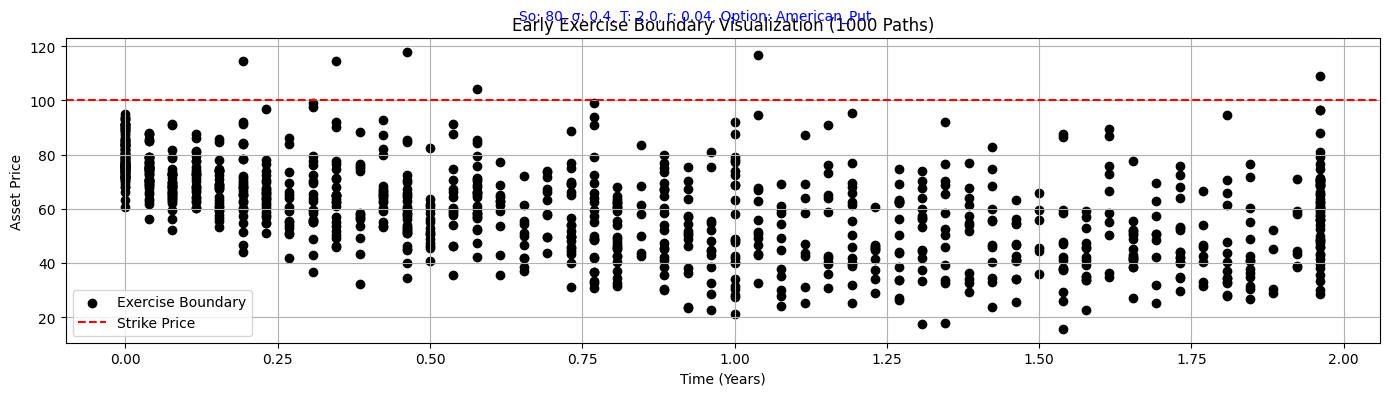

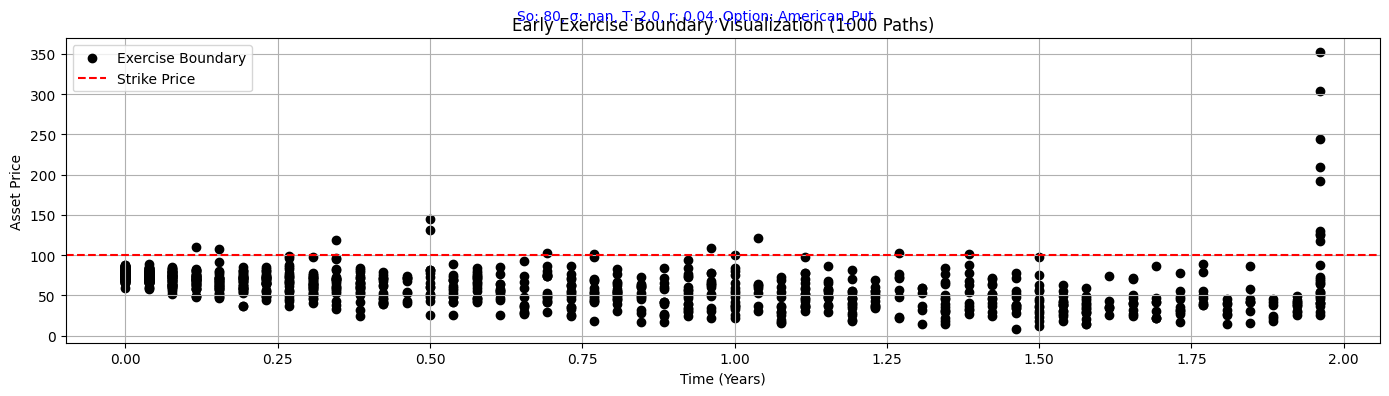

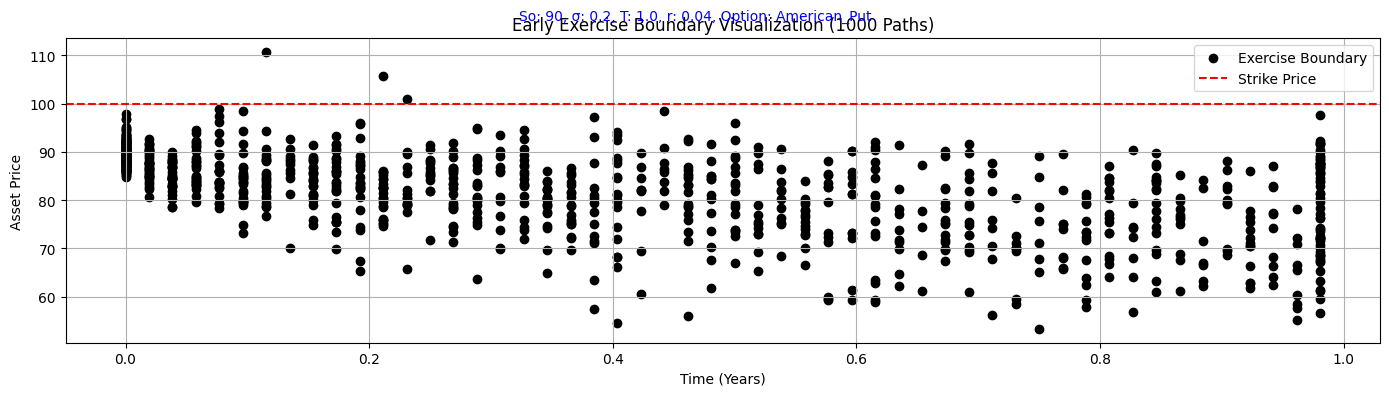

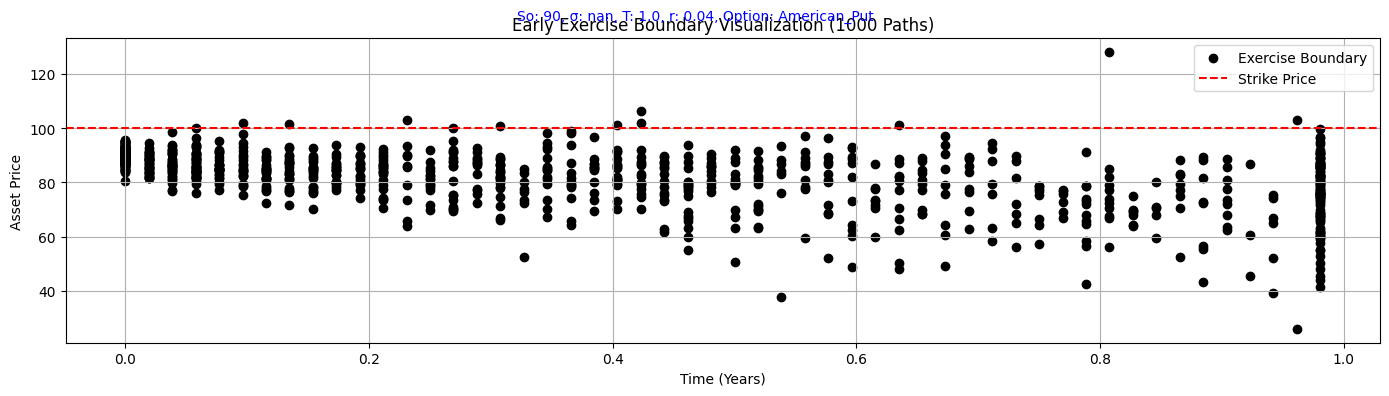

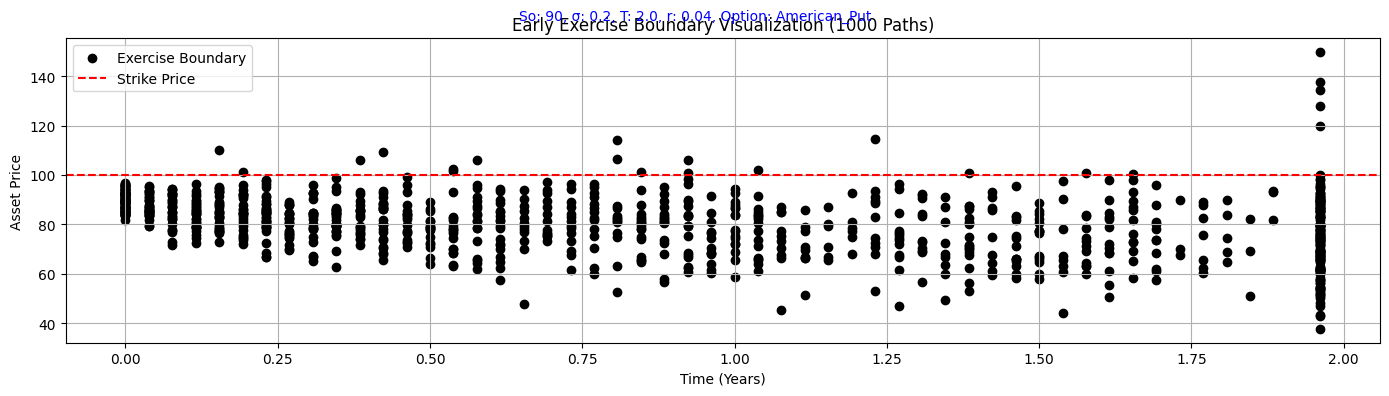

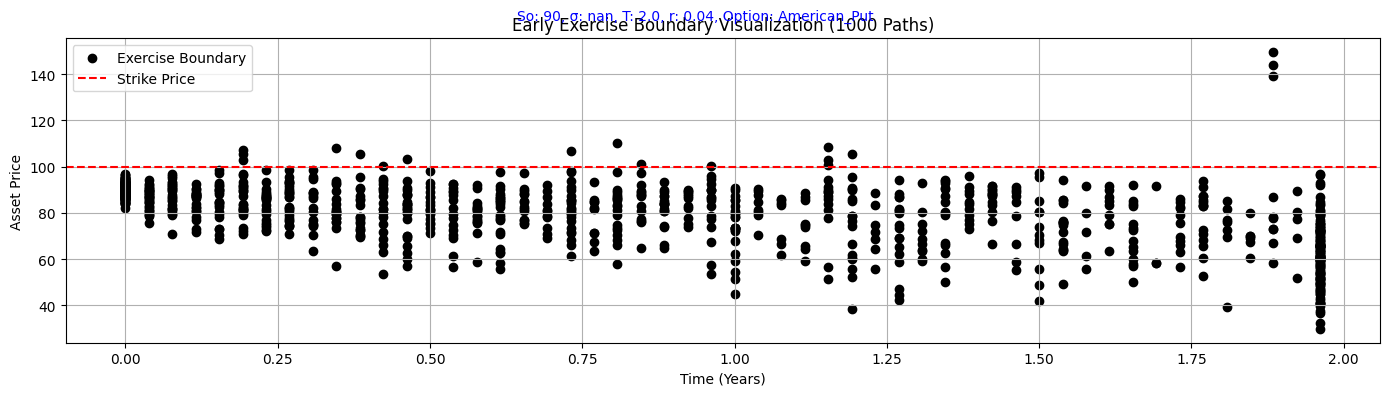

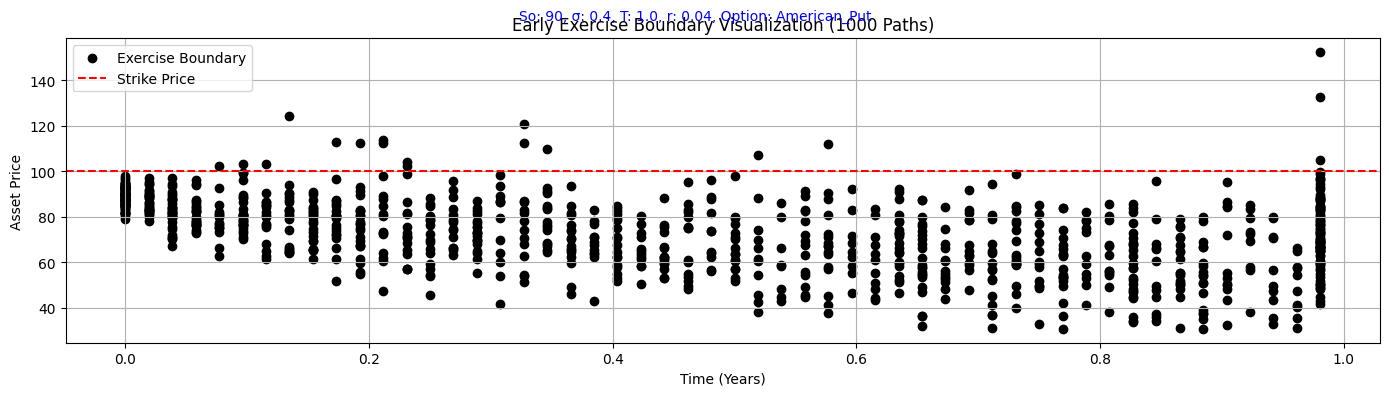

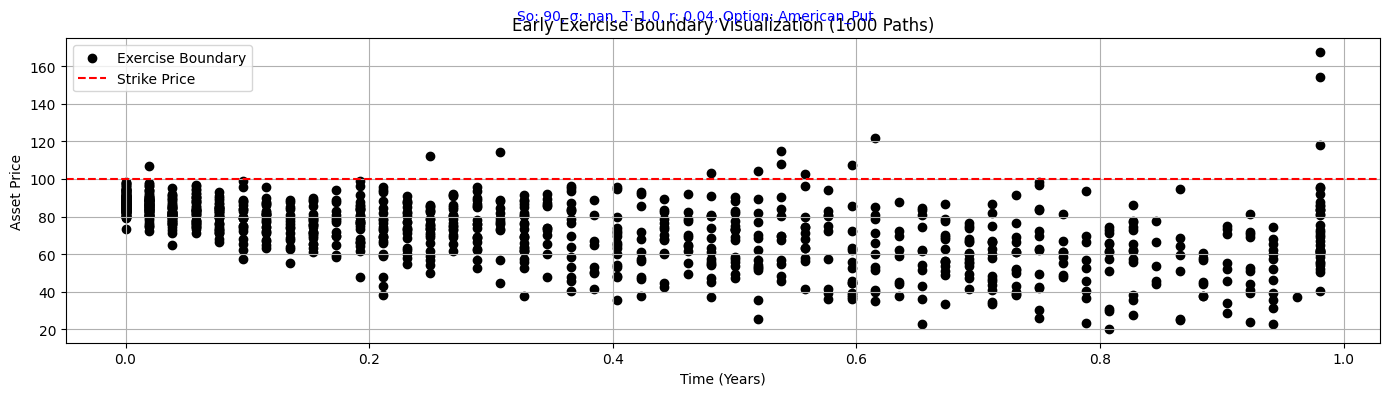

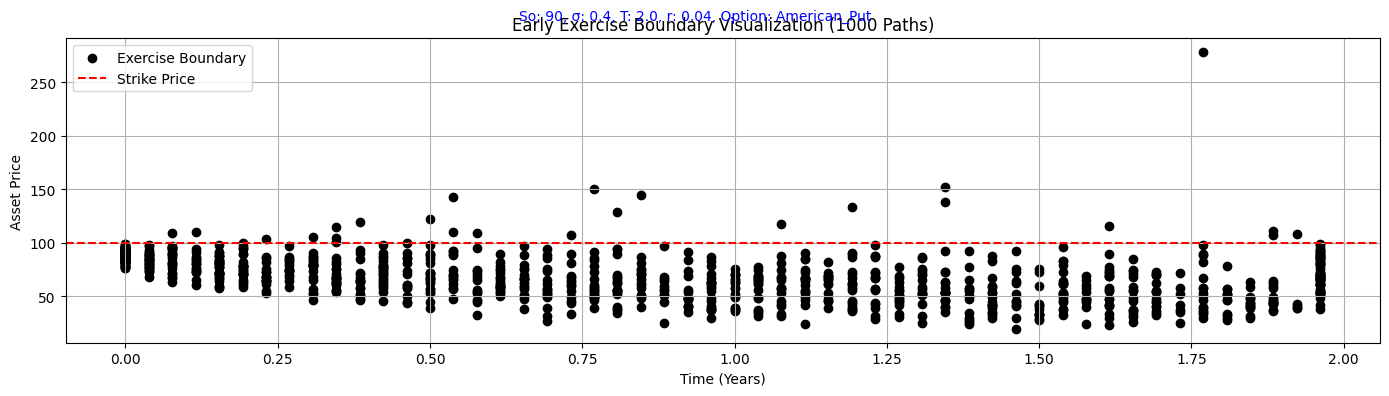

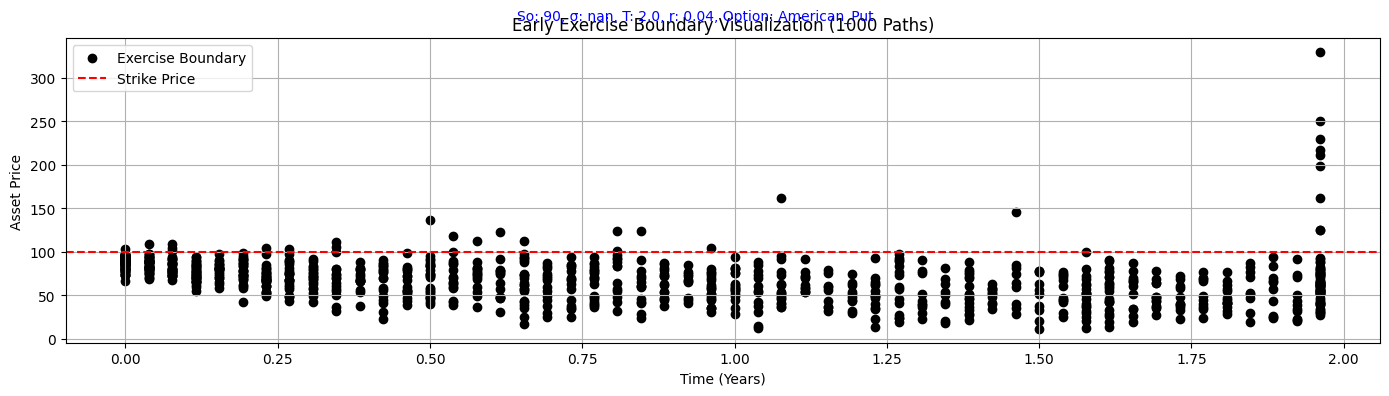

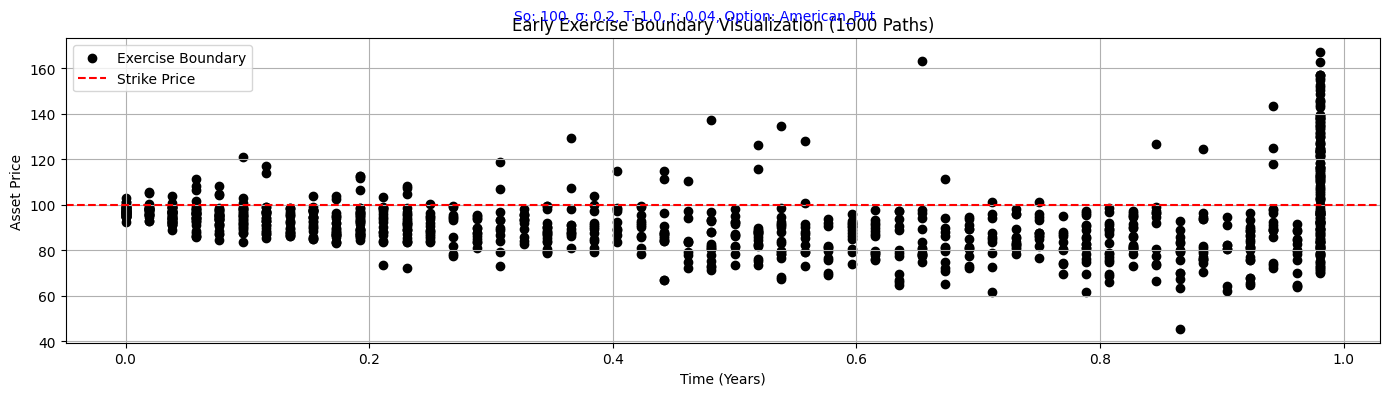

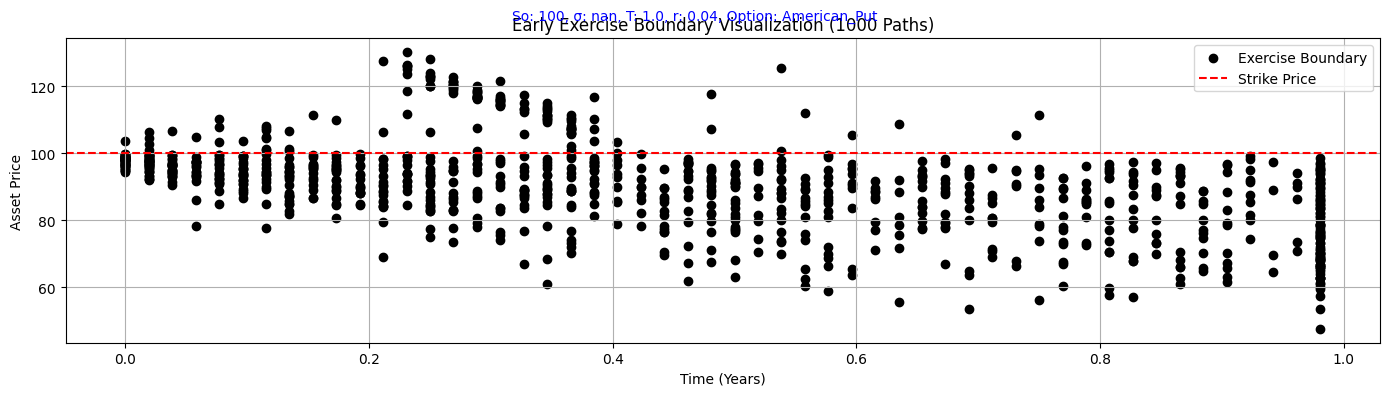

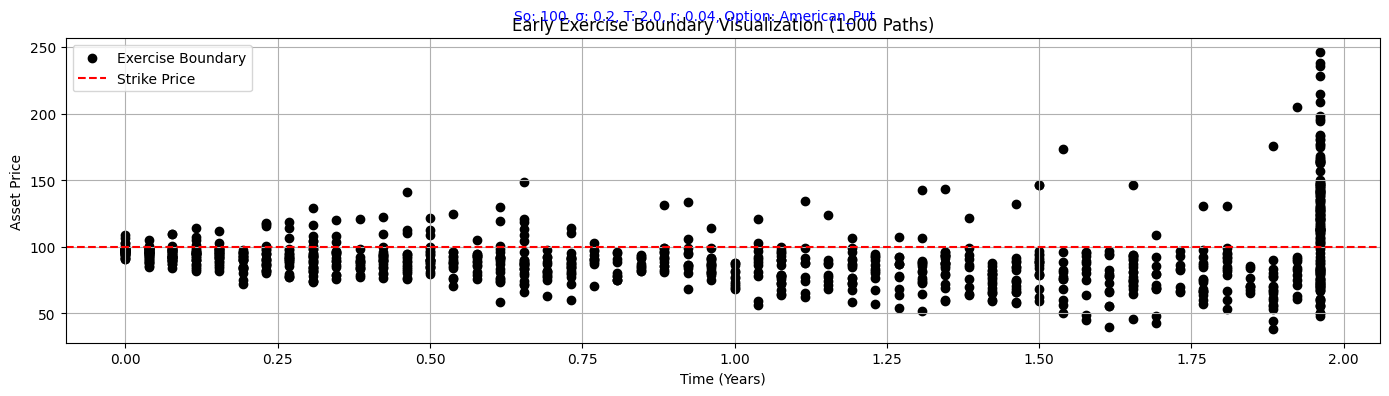

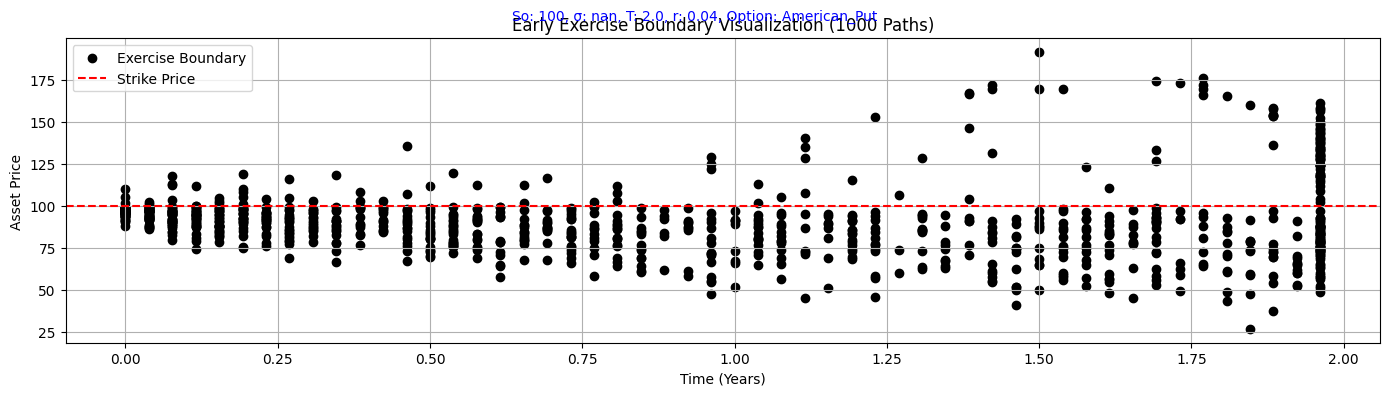

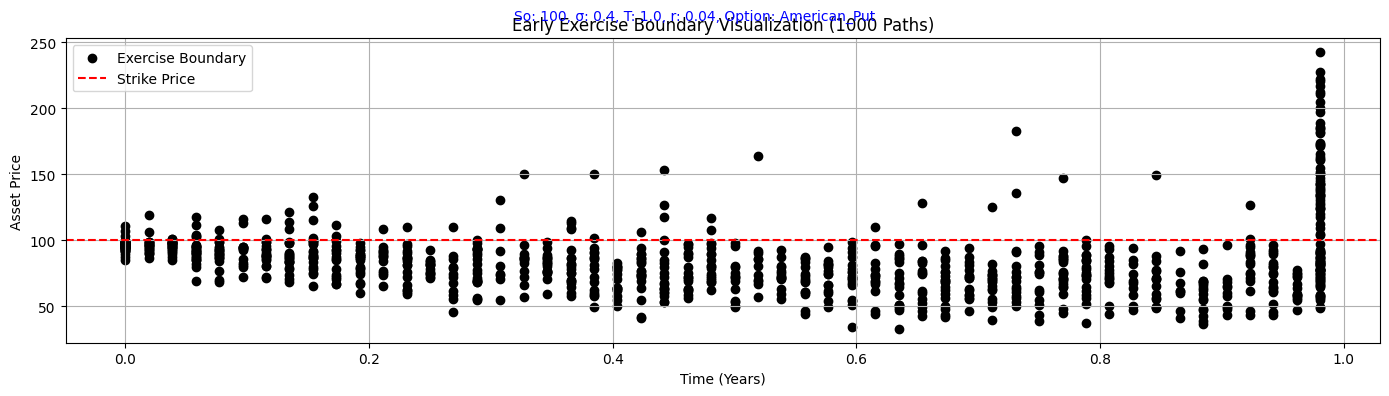

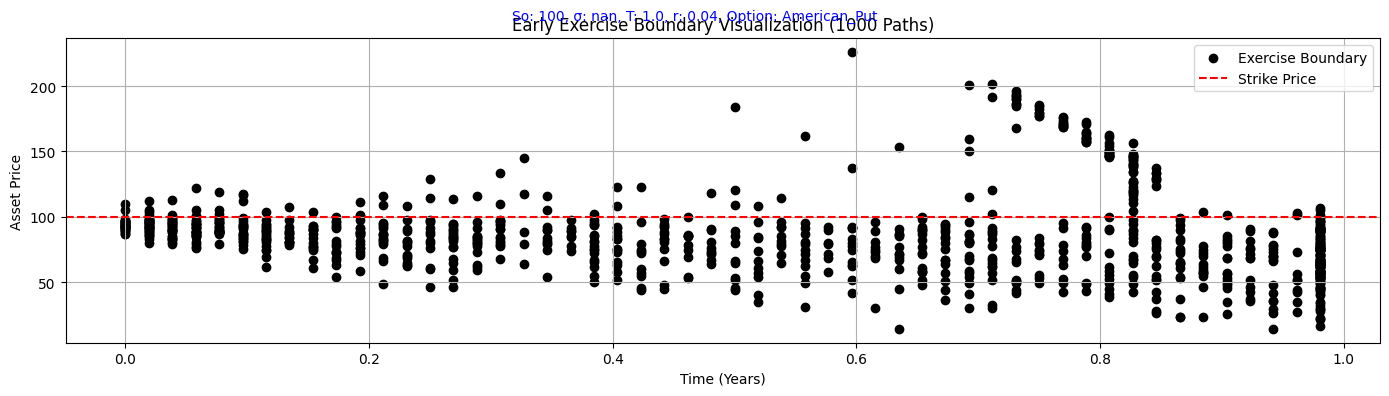

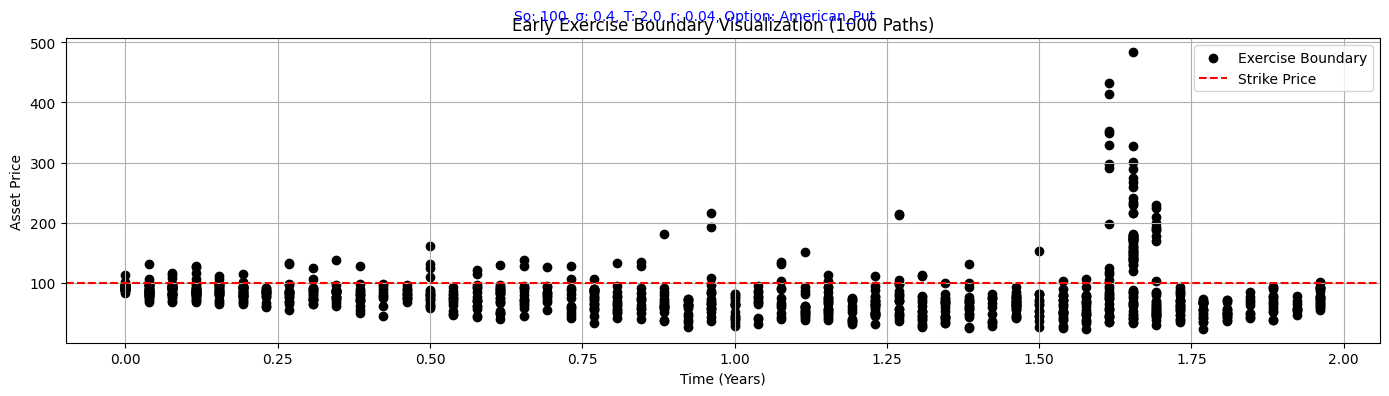

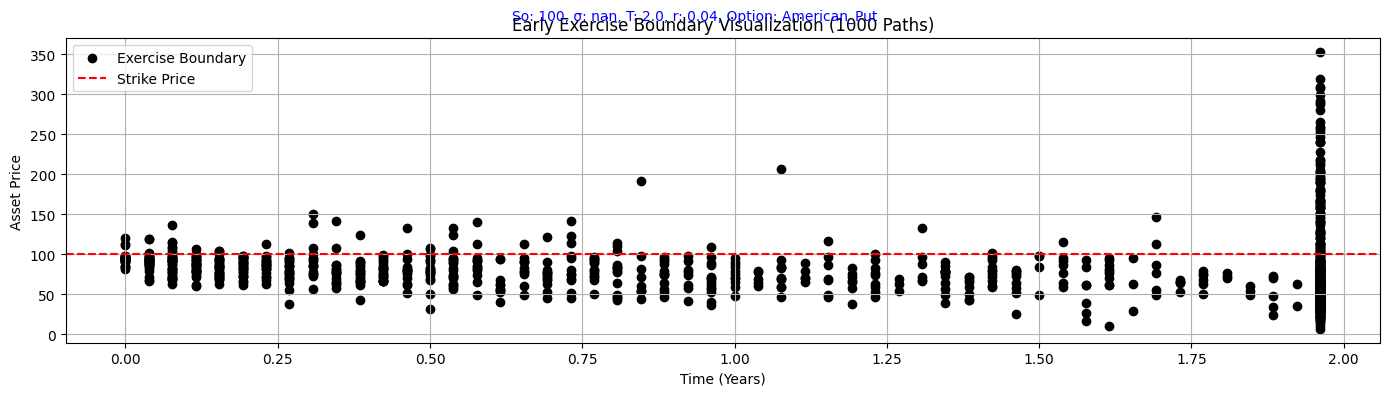

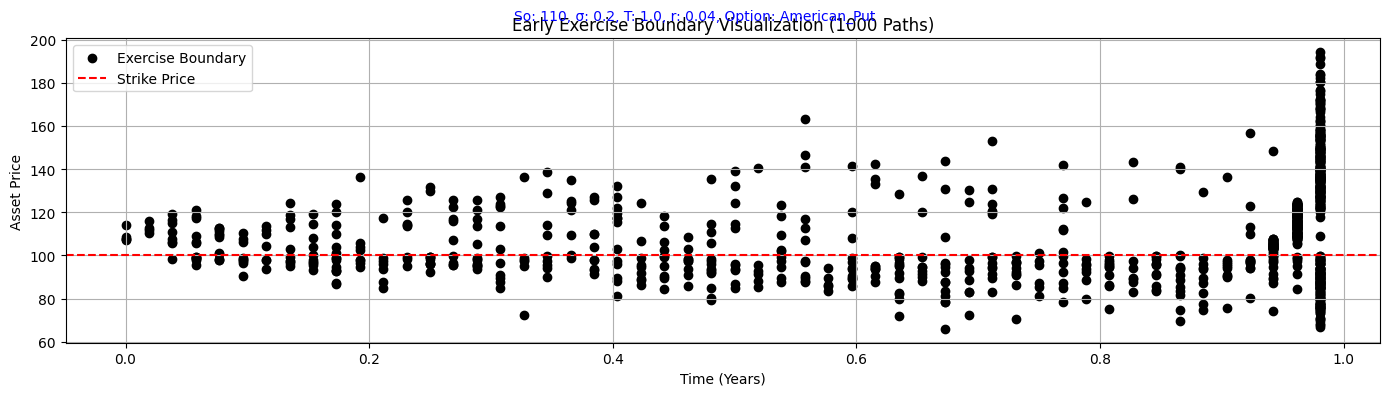

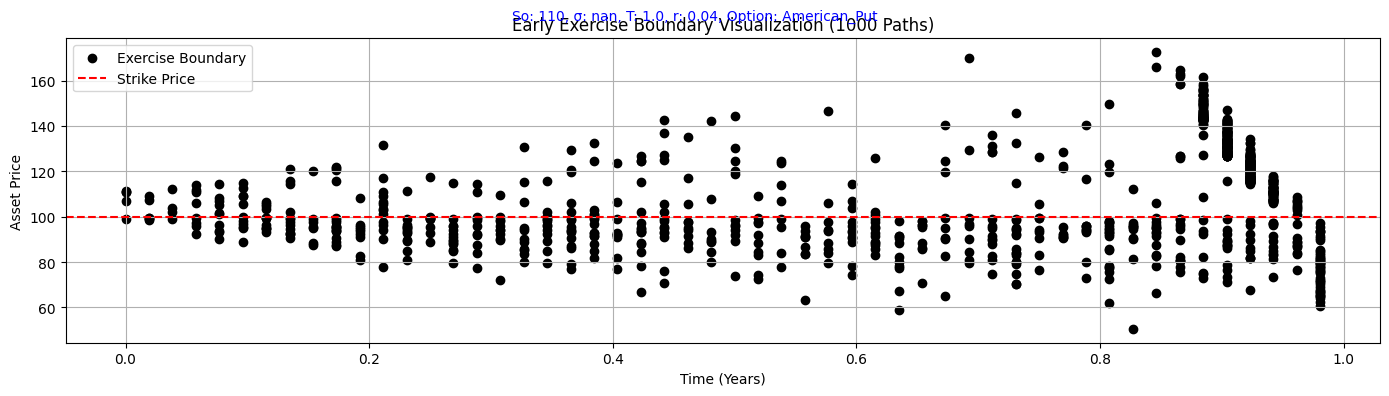

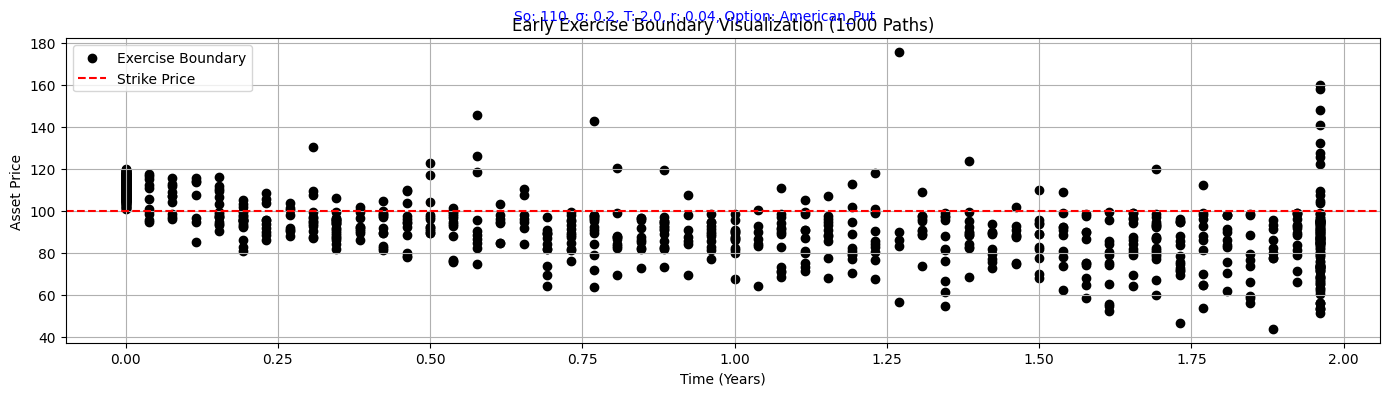

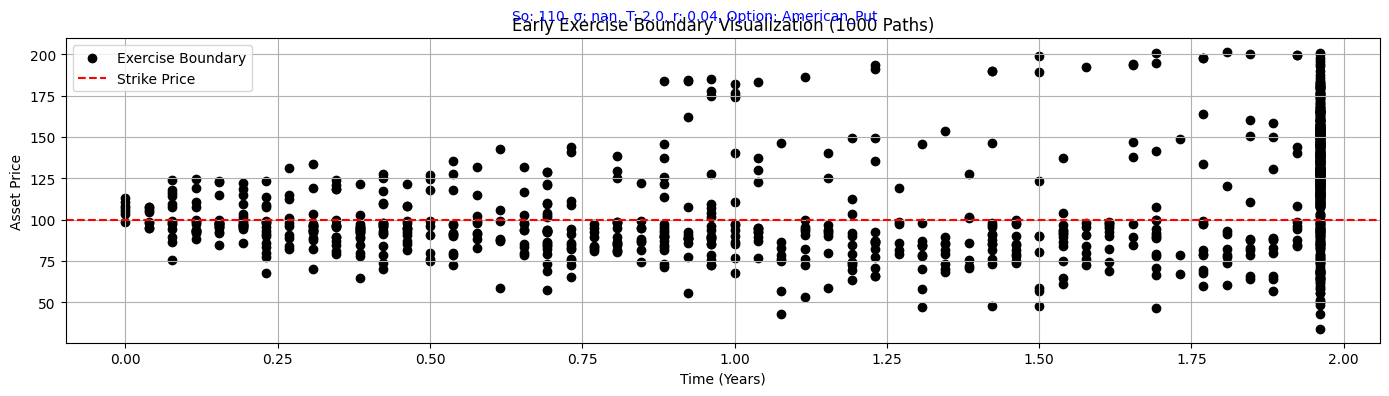

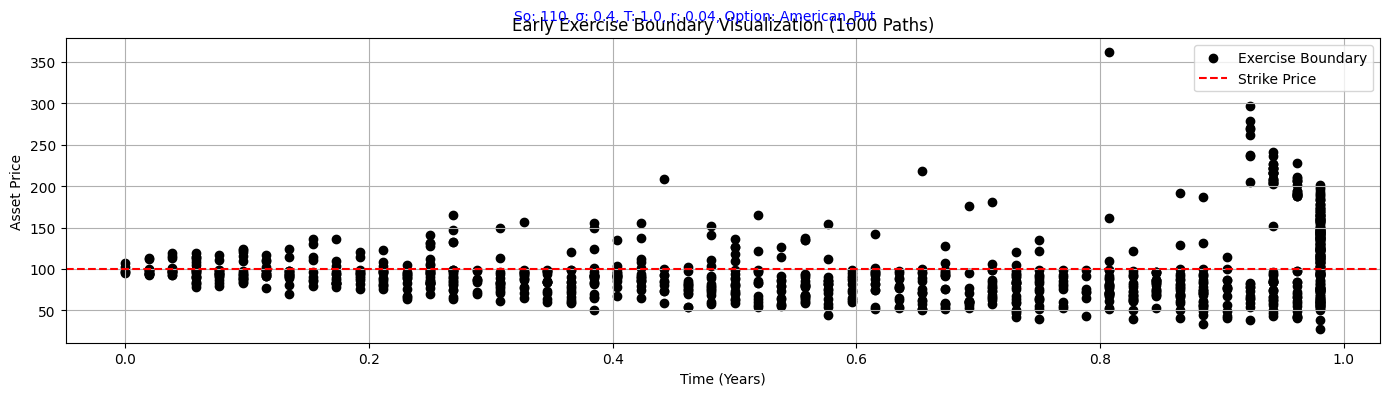

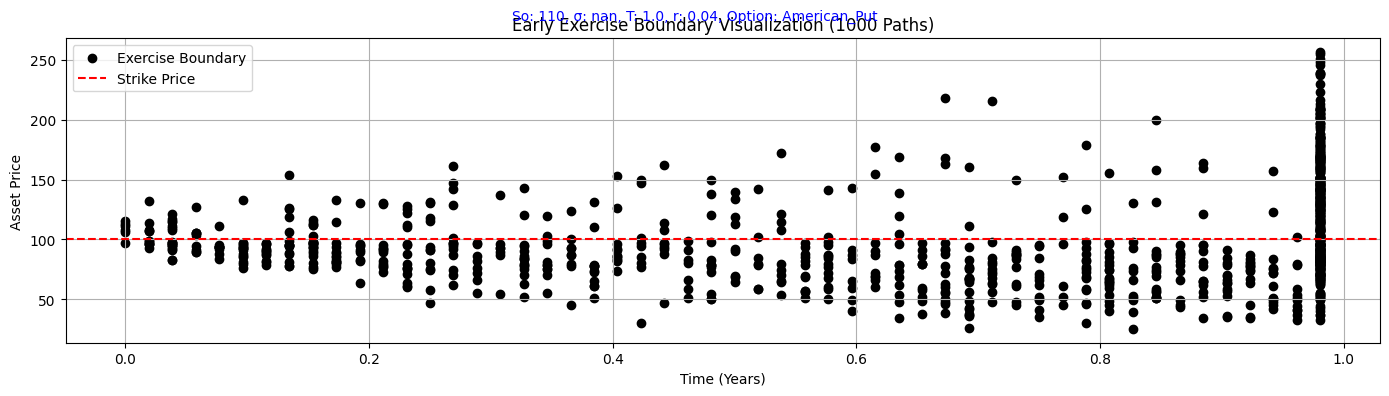

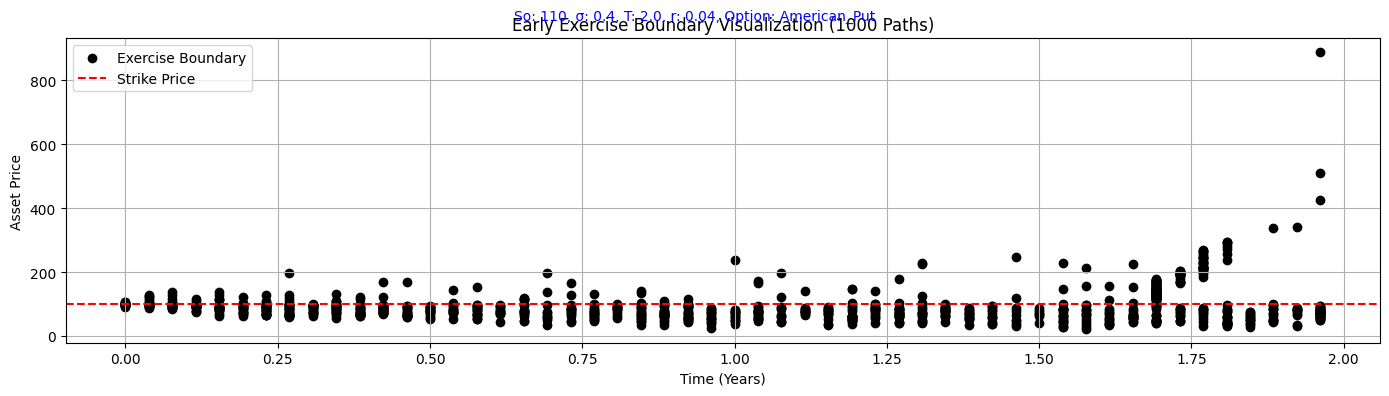

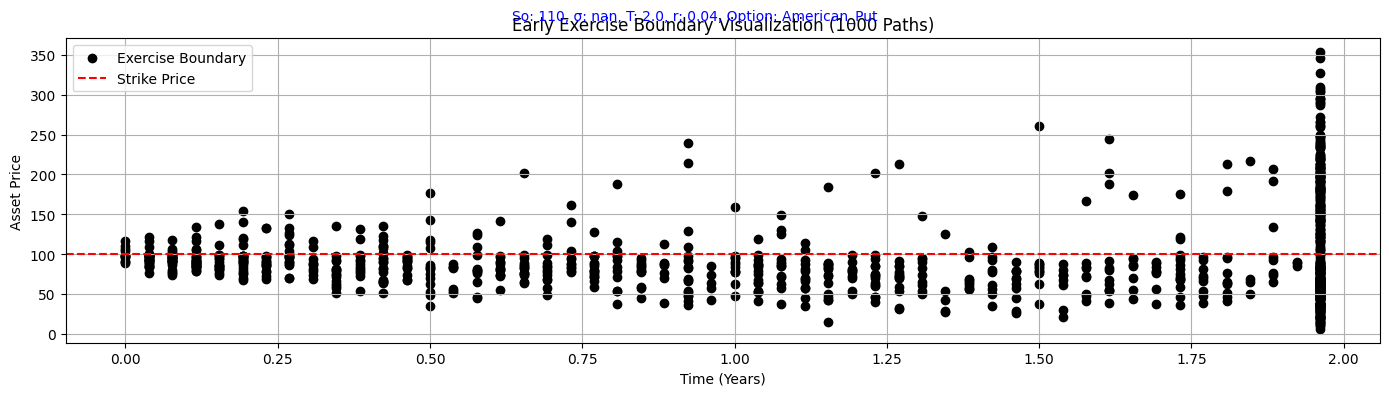

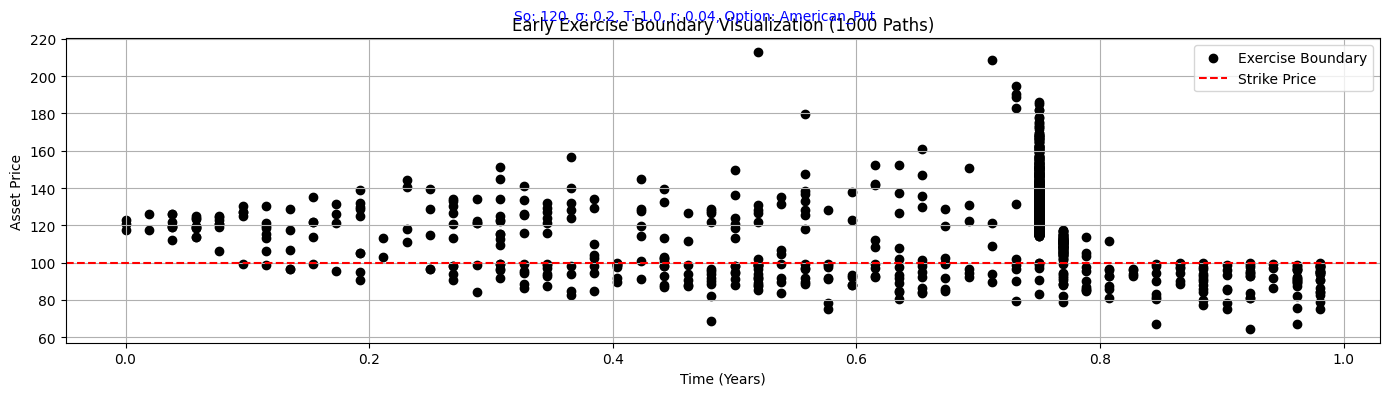

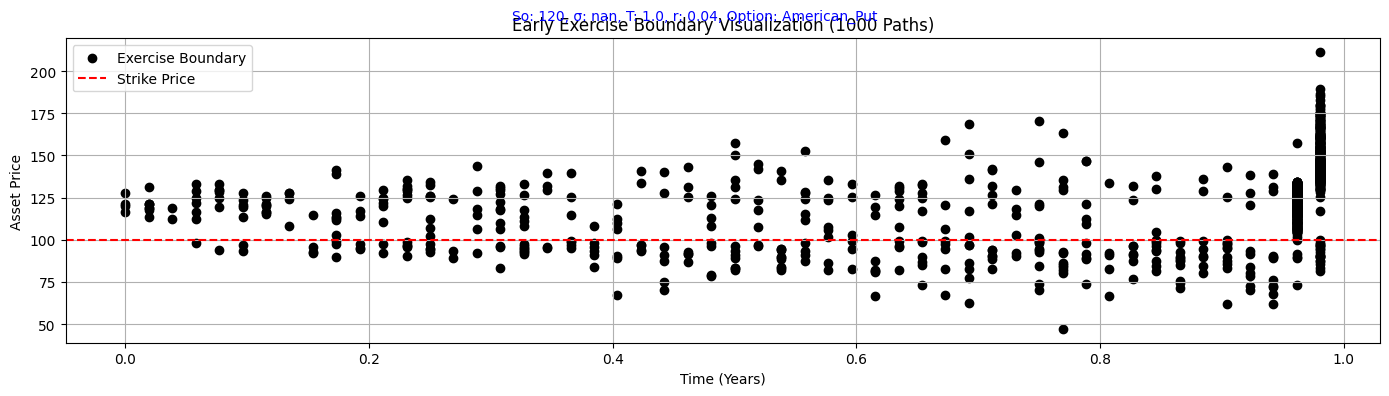

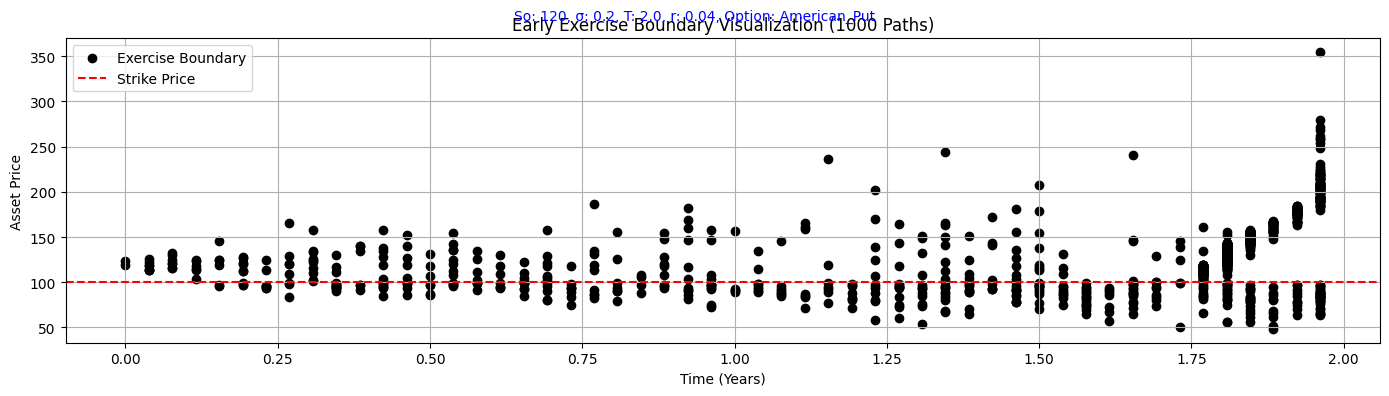

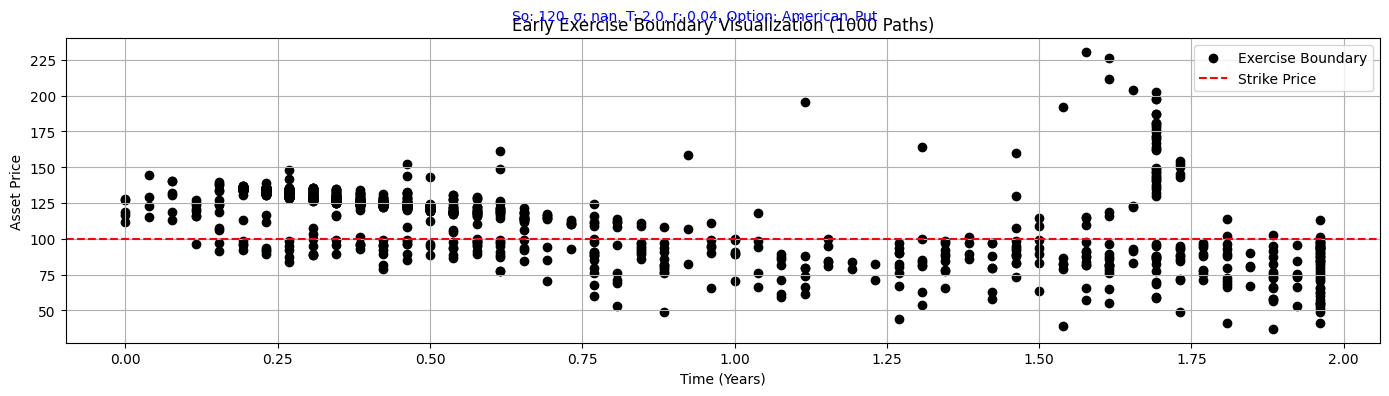

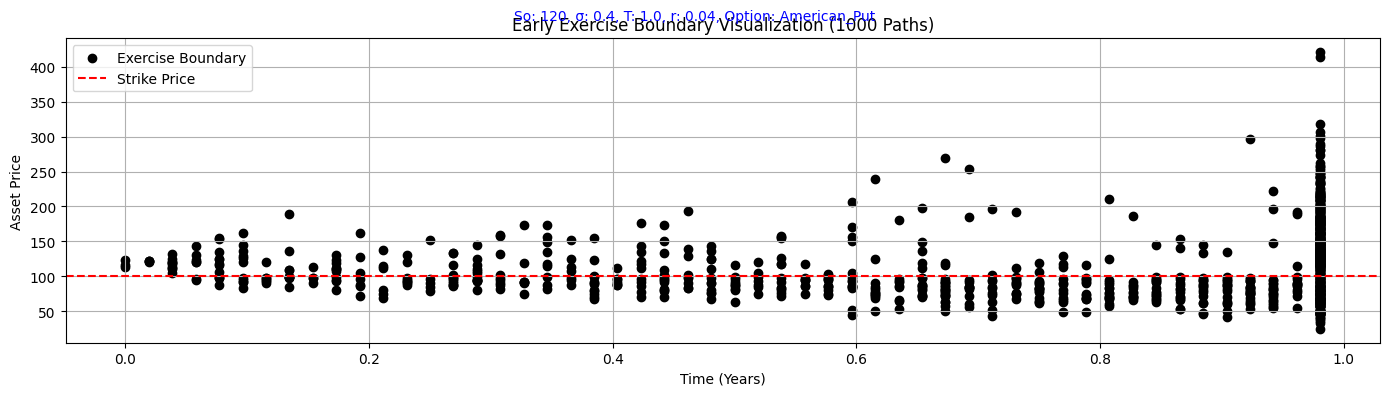

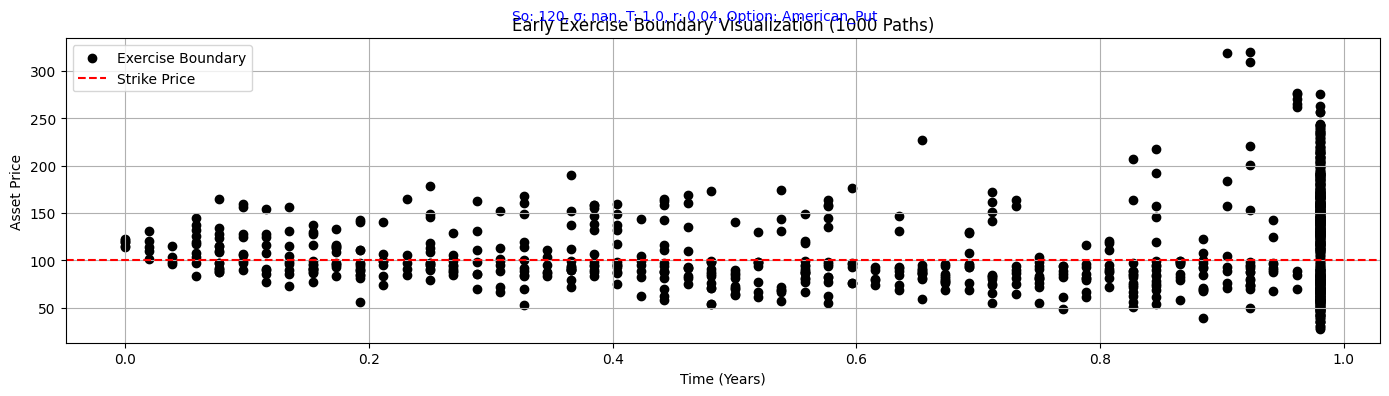

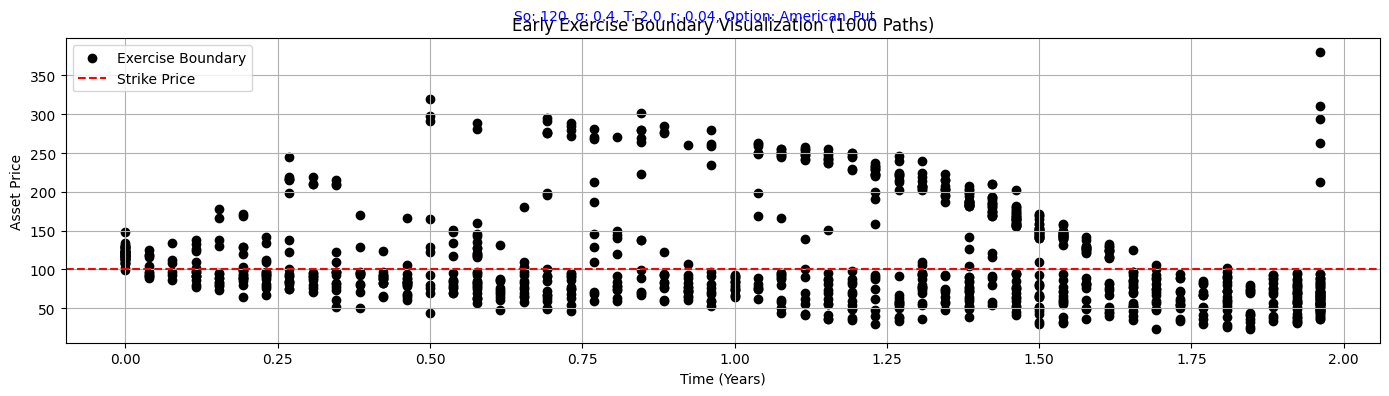

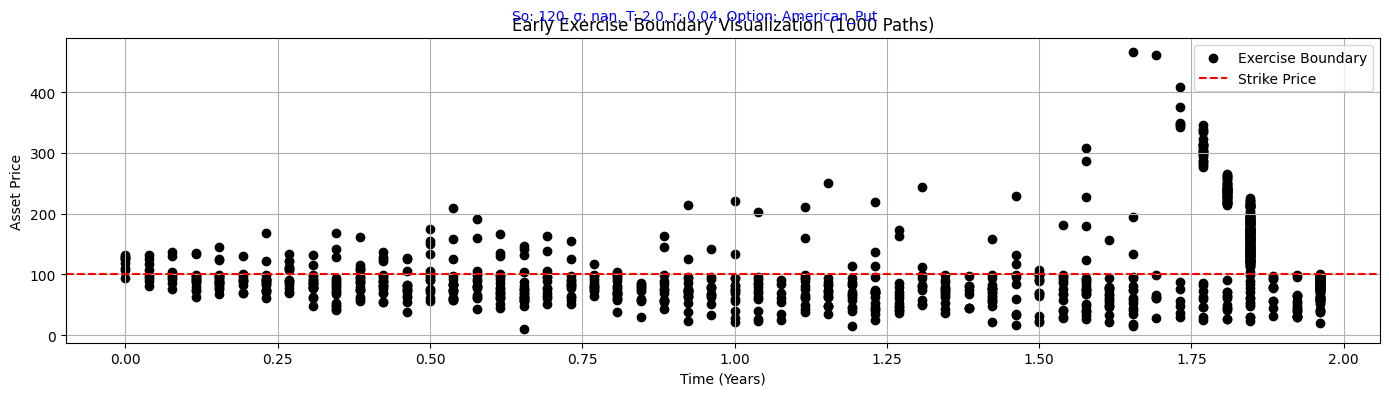

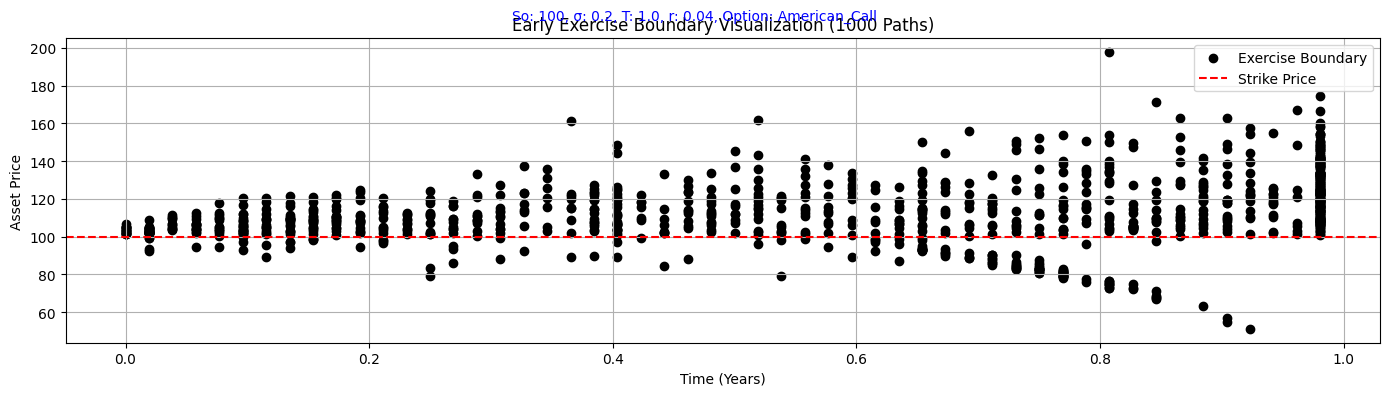

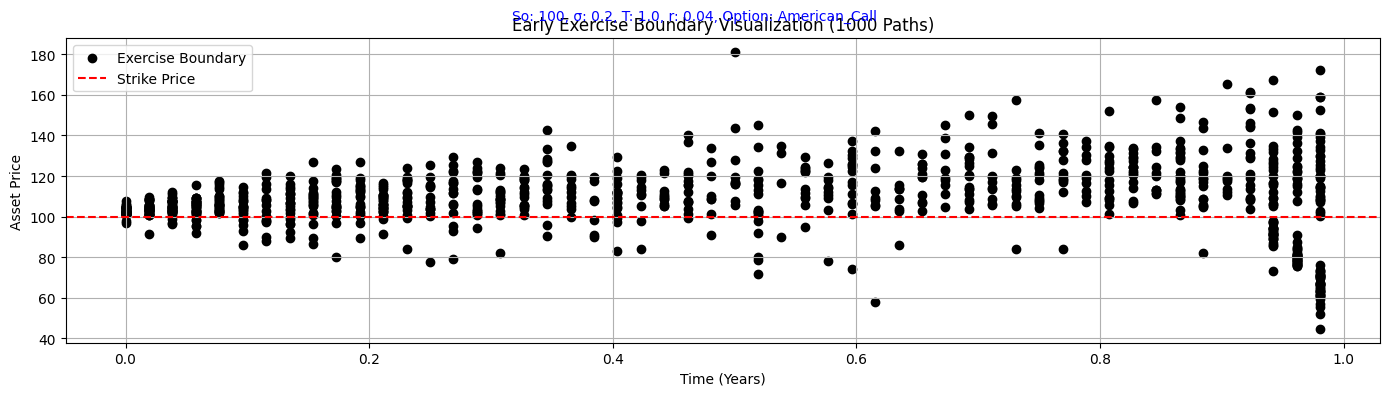

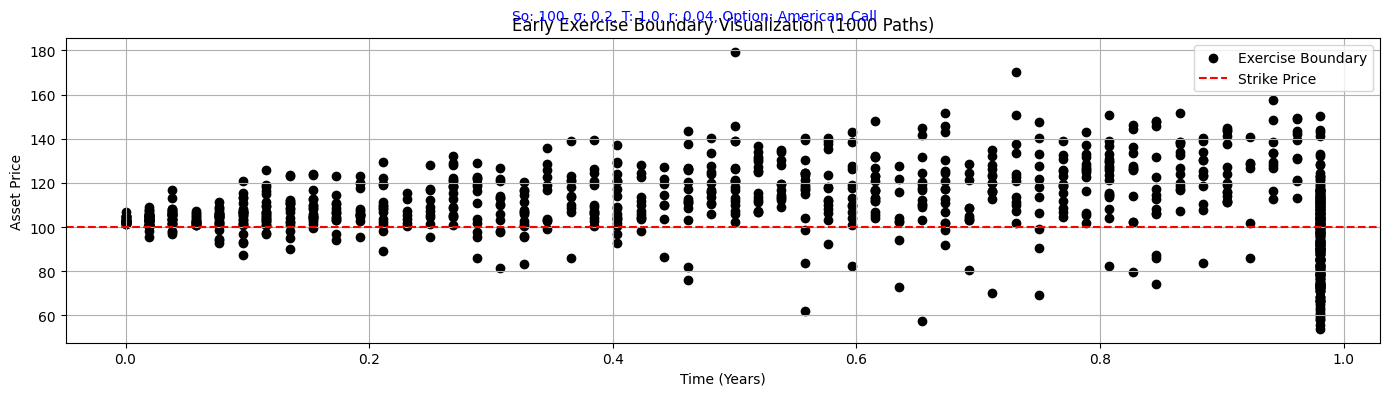

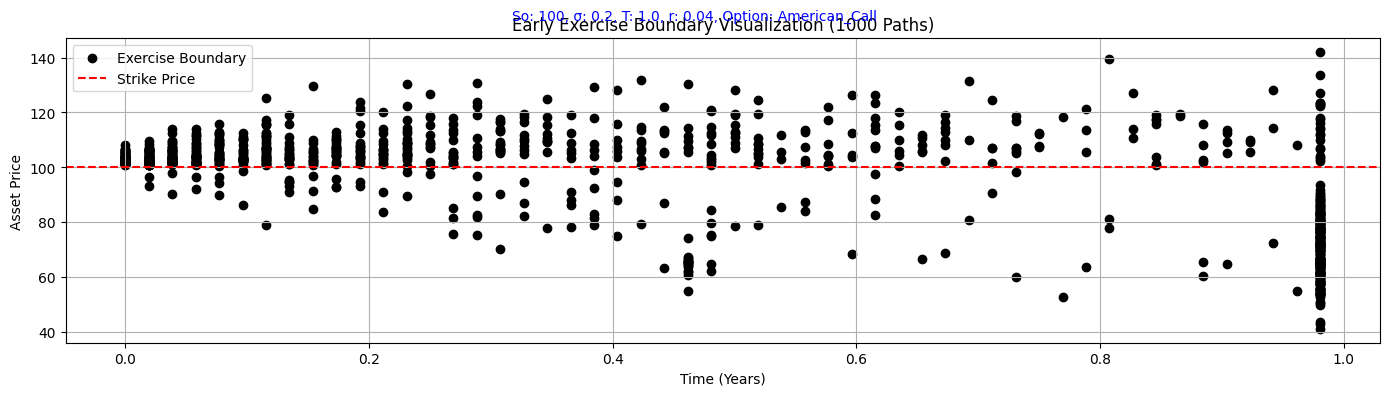

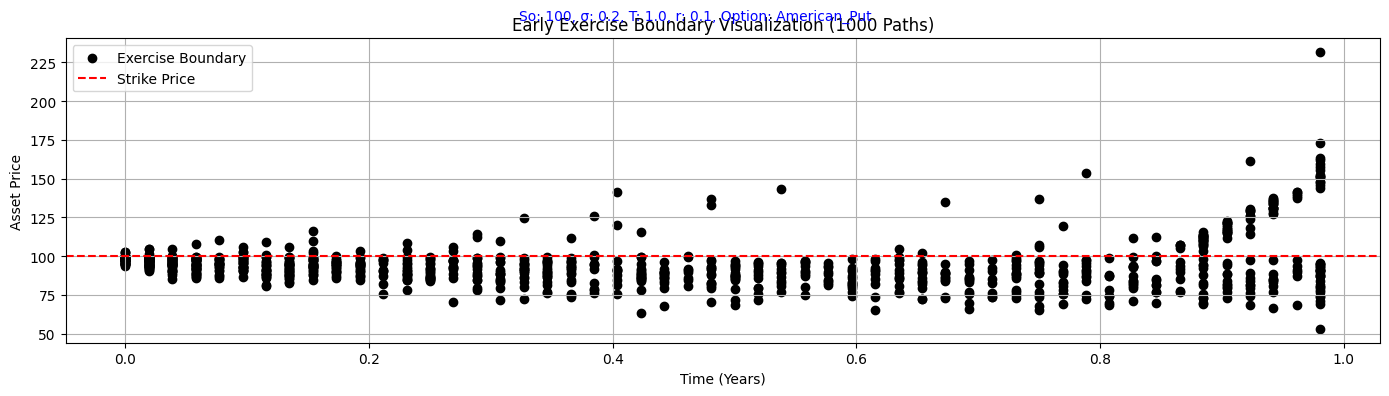

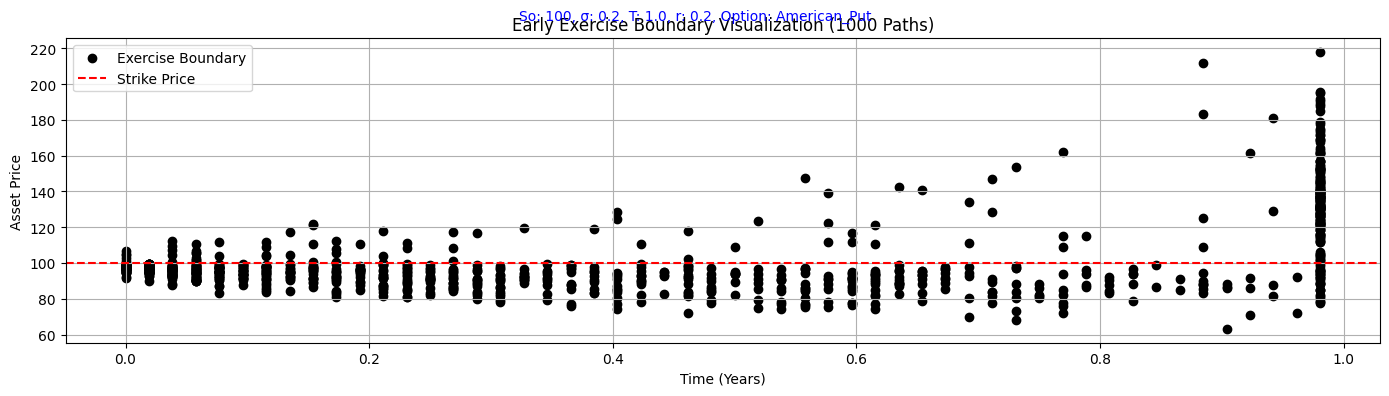

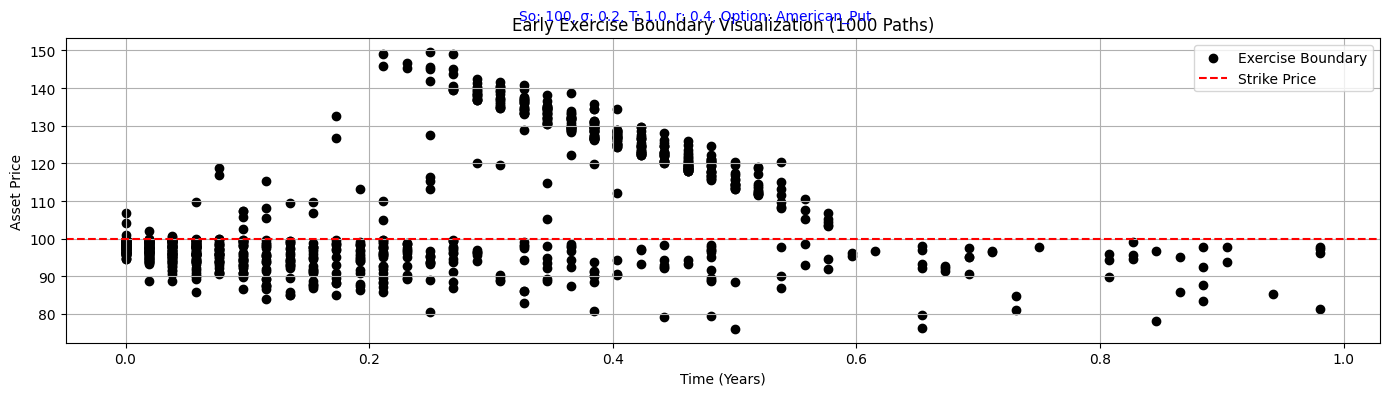

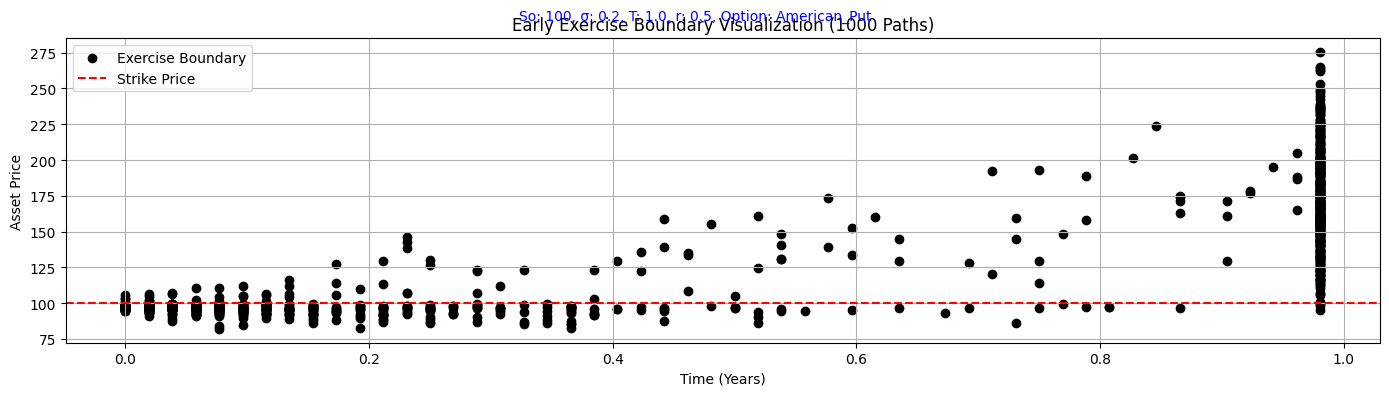

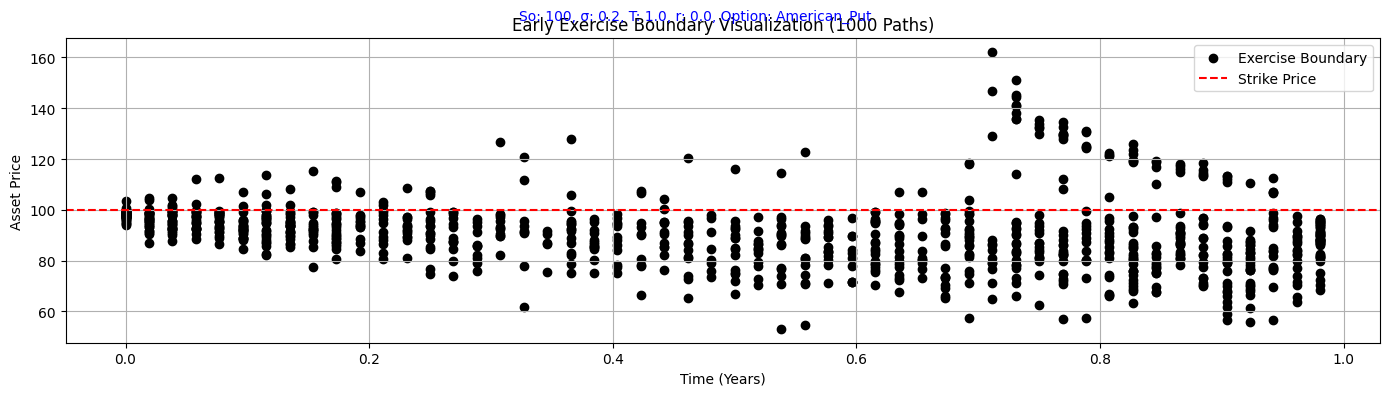

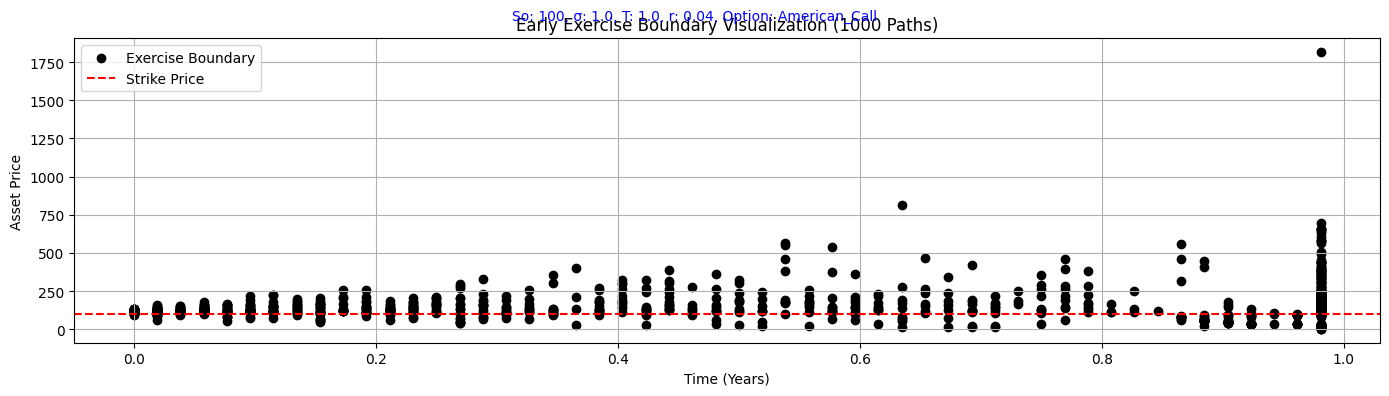

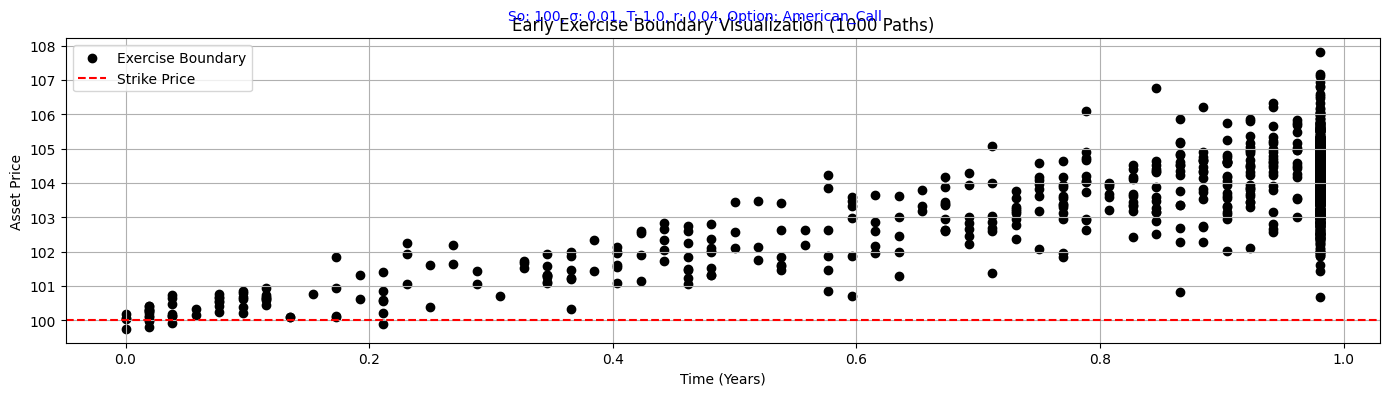

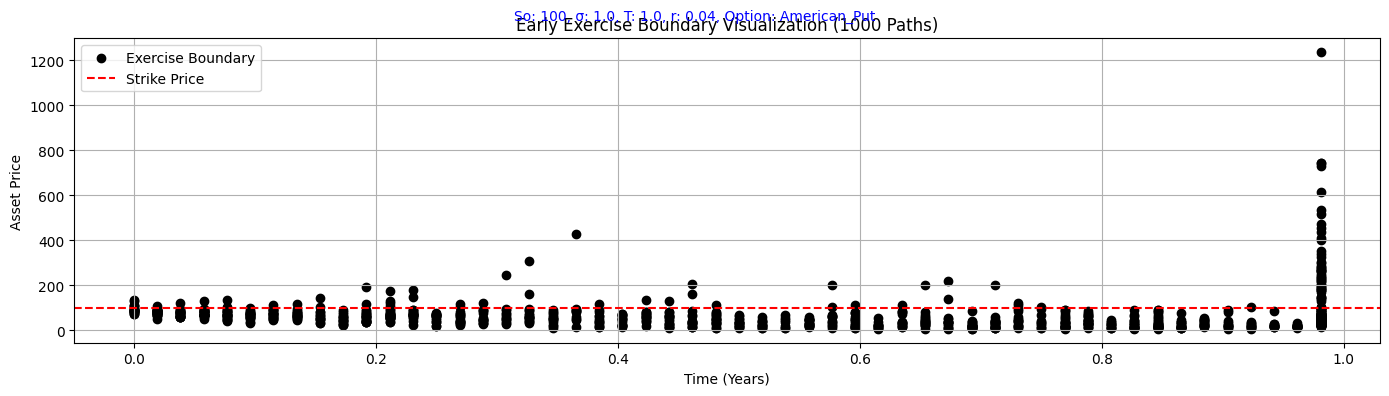

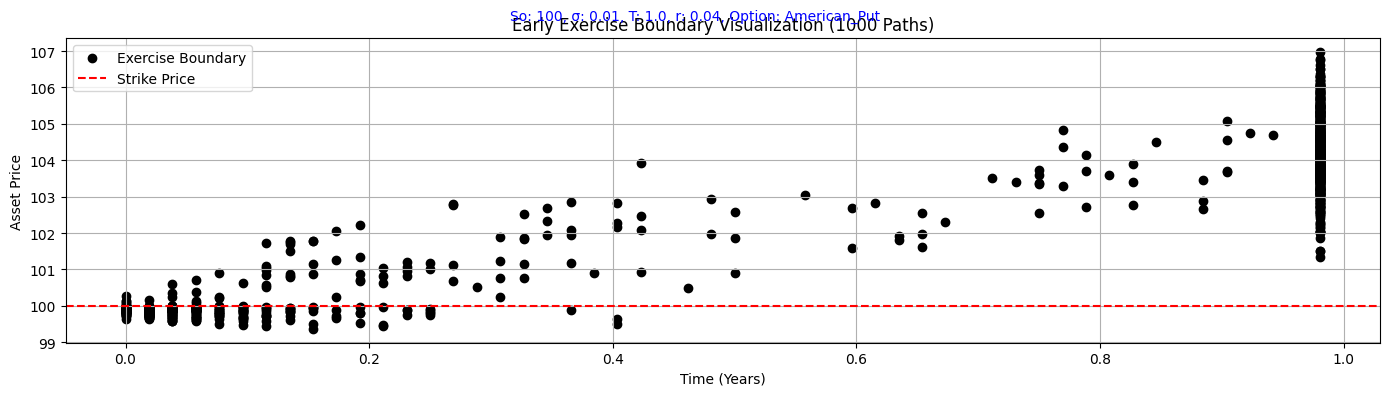

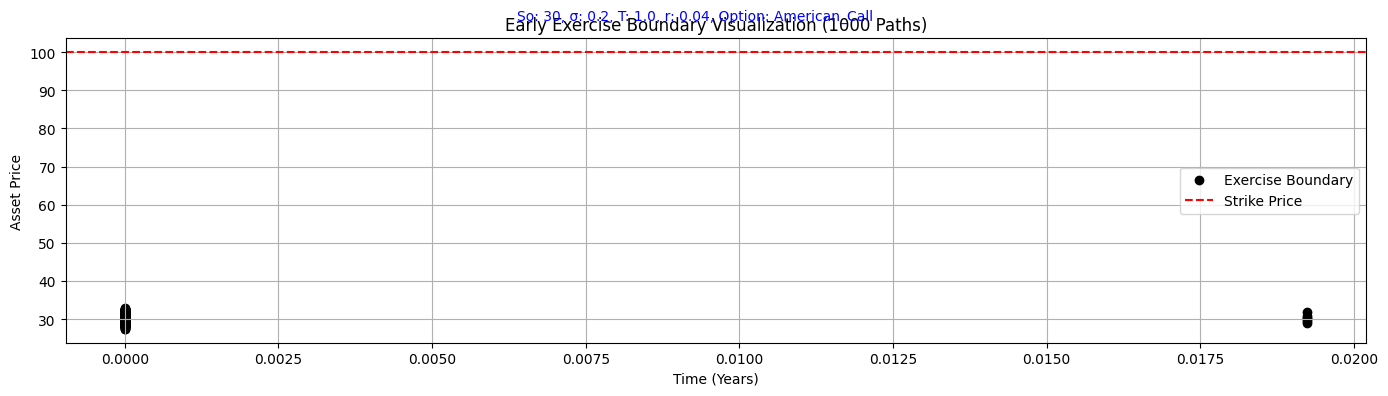

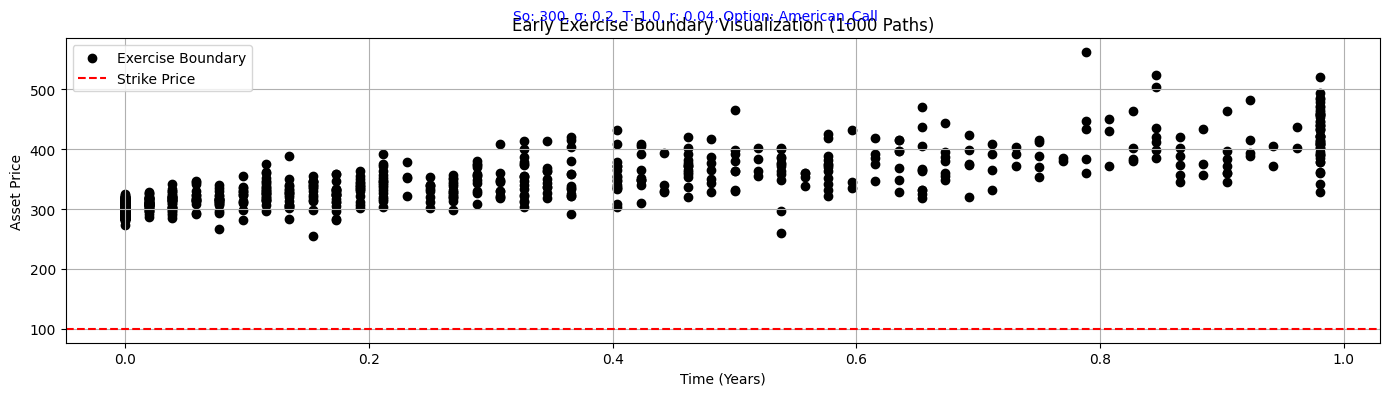

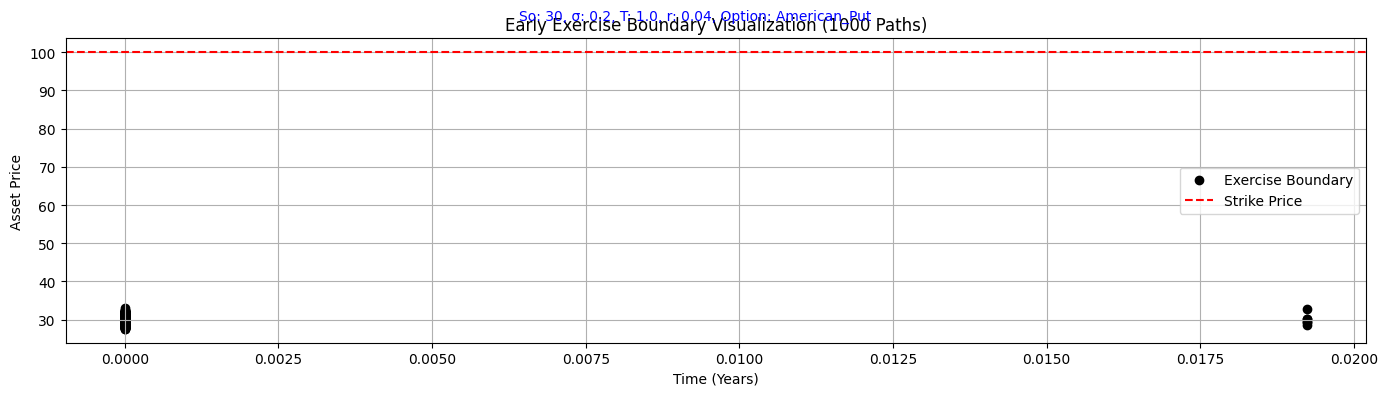

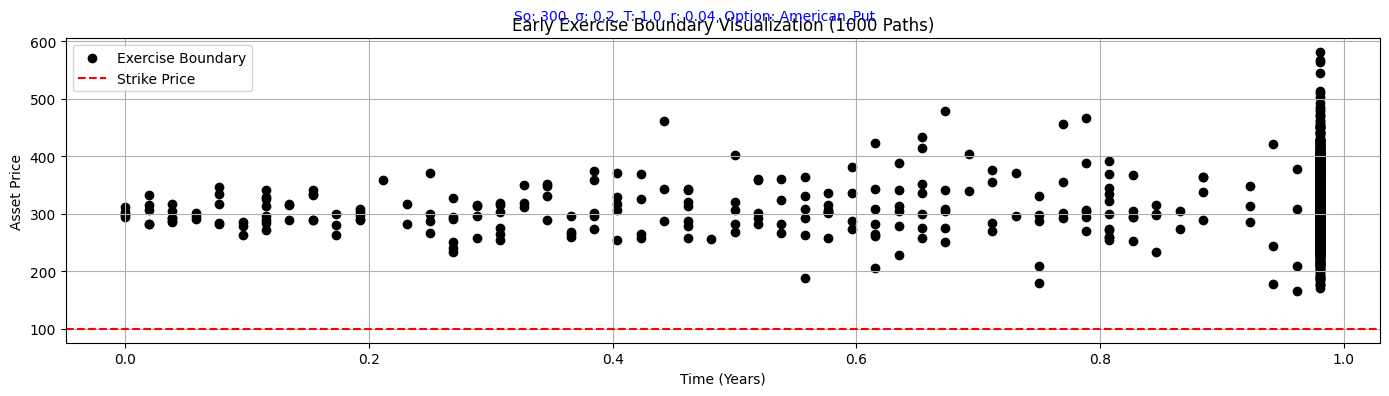

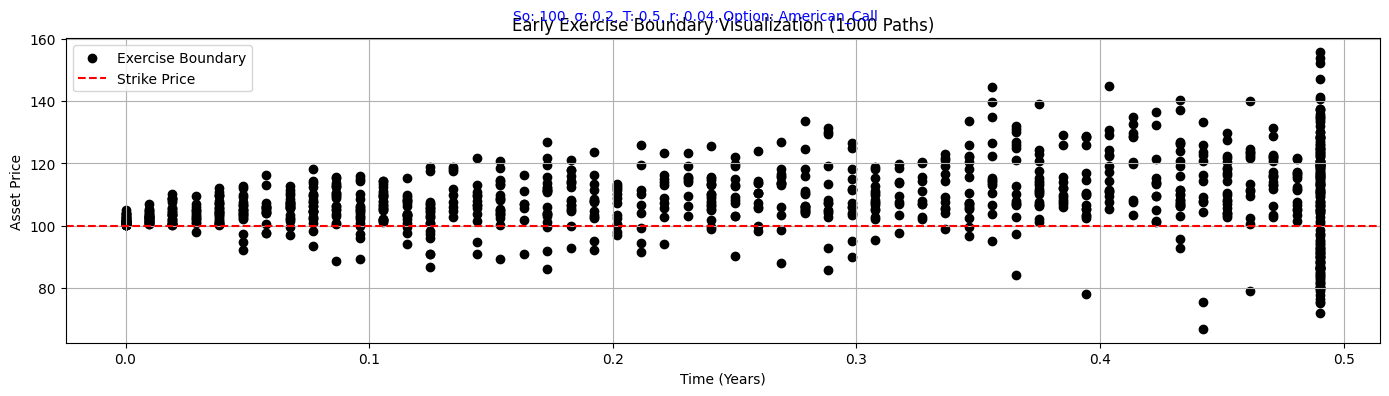

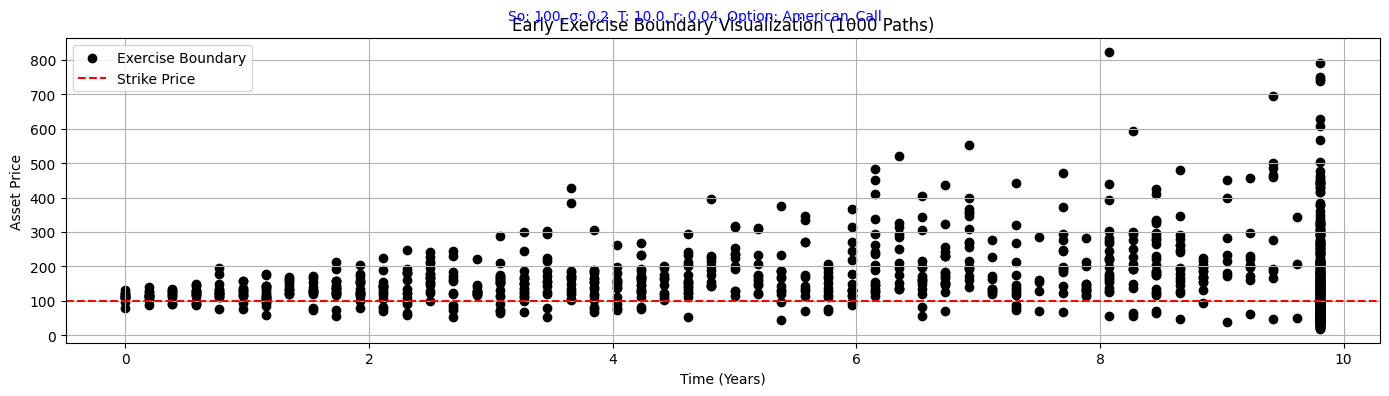

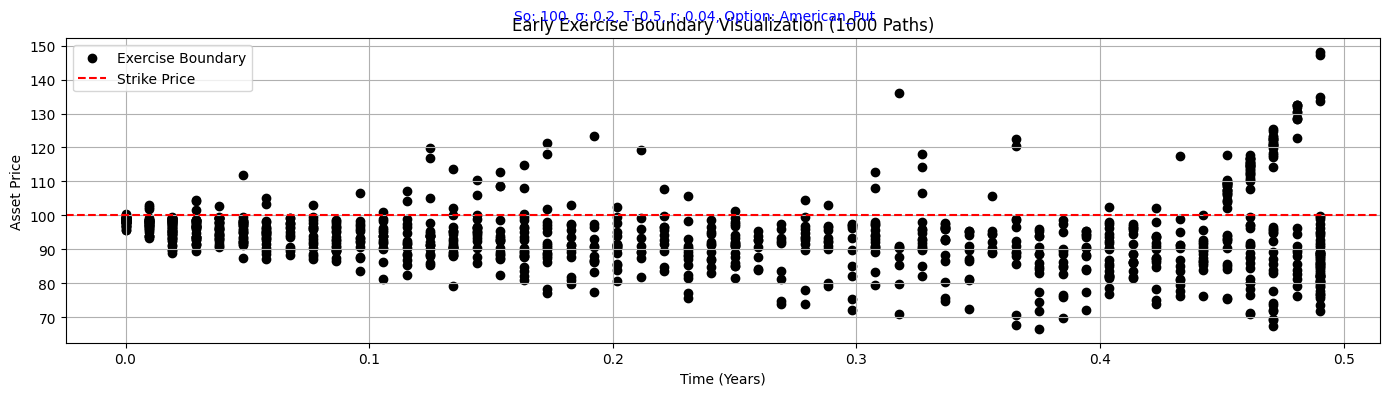

<Figure size 640x480 with 0 Axes>

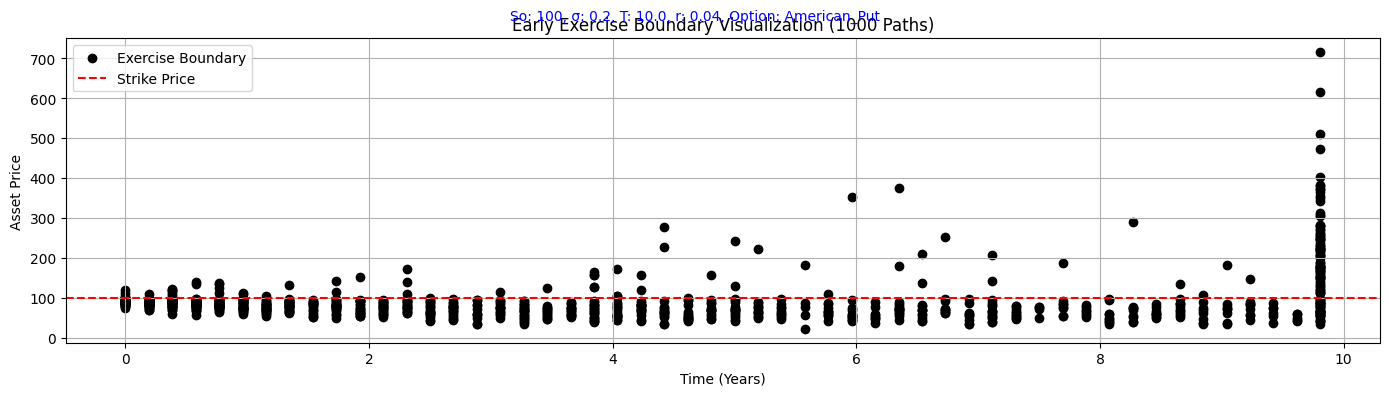

In [ ]:
def show_fig2_with_params(results, df):
    for idx, result in enumerate(results):
        fig2 = result[4] 
        if fig2 is not None:
            params = df.iloc[idx]
            param_text = (
                f"So: {params['s_0']}, σ: {params['v'] or params['sigma']}, "
                f"T: {params['t2']}, r: {params['r']}, "
                f"Option: {params['h']}"
            )
            
            fig2.suptitle(param_text, fontsize=10, color='blue')
            
            
            plt.figure(fig2.number) 
            show_figure(fig2)

show_fig2_with_params(results, df)